In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report, recall_score, precision_score, plot_roc_curve, roc_curve
from sklearn.metrics import plot_confusion_matrix
#for table in the dark mode
from matplotlib import style
#style.use('dark_background')

import wandb

## Reine Daten

In [411]:
df_raw = pd.read_csv('kredit.csv')

In [412]:
df = df_raw.copy(deep=True)

In [413]:
df['zahlung pro monat'] = df['hoehe'] / df['laufzeit']

In [414]:
df.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,zahlung pro monat
0,1,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,1,1,1,58.277778
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,2,1,1,311.000000
2,1,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,1,1,1,70.083333
3,1,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,2,1,2,176.833333
4,1,1,12,4,0,2171,1,3,4,3,...,2,38,1,2,2,2,1,1,2,180.916667


In [415]:
X = df.drop('kredit', axis=1)

In [416]:
y = df['kredit']

In [8]:
from sklearn.model_selection import train_test_split

In [1168]:

####### Für Skalierung bis hier, zu 2 Version #######

In [1169]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=42, stratify= y)

In [1170]:
X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42, stratify= y_other)

## Version 

- nicht skaliert werden
- das Parameter nicht optimiert werden

### Logit

In [1171]:
len(X_train)

700

In [1172]:
y_train.value_counts(normalize=True)

1    0.7
0    0.3
Name: kredit, dtype: float64

In [1173]:
y_test.value_counts(normalize=True)

1    0.7
0    0.3
Name: kredit, dtype: float64

In [1174]:
y_eval.value_counts(normalize=True)

1    0.7
0    0.3
Name: kredit, dtype: float64

In [1175]:
len(X_eval)

150

In [1176]:
len(X_test)

150

In [1177]:
from sklearn.linear_model import LogisticRegression

logit_base = LogisticRegression(max_iter=1000)

In [1178]:
logit_base.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1179]:
# testen mit Evaluation

y_eval_pred = logit_base.predict(X_eval)
y_eval_pred_proba = logit_base.predict_proba(X_eval)[:, 1]

# testen mit train

y_train_class = logit_base.predict(X_train)
y_train_proba = logit_base.predict_proba(X_train)[:, 1]

In [1180]:
# eval score

print(roc_auc_score(y_eval, y_eval_pred_proba))
print(f1_score(y_eval, y_eval_pred))
print(accuracy_score(y_eval, y_eval_pred))
print(recall_score(y_eval, y_eval_pred))
print(precision_score(y_eval, y_eval_pred))

0.7944973544973546
0.8546255506607929
0.78
0.9238095238095239
0.7950819672131147


In [1181]:
# train score

print(roc_auc_score(y_train, y_train_proba))
print(f1_score(y_train, y_train_class))
print(accuracy_score(y_train, y_train_class))
print(recall_score(y_train, y_train_class))
print(precision_score(y_train, y_train_class))

0.7899708454810497
0.8431001890359169
0.7628571428571429
0.9102040816326531
0.7852112676056338


In [1182]:
# report mit test

y_final_test_pred = logit_base.predict(X_test)

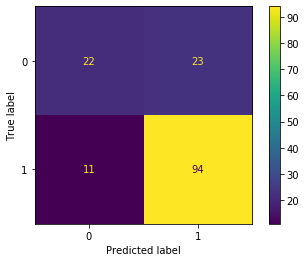

In [1183]:
plot_confusion_matrix(logit_base, X_test, y_test)

In [1184]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.49      0.56        45
           1       0.80      0.90      0.85       105

    accuracy                           0.77       150
   macro avg       0.74      0.69      0.71       150
weighted avg       0.76      0.77      0.76       150



In [1185]:
y_final_test_pred_proba = logit_base.predict_proba(X_test)[:, 1]

In [1186]:
roc_auc_score(y_test, y_final_test_pred_proba)


0.8067724867724868

In [1187]:
from sklearn.metrics import log_loss

log_loss(y_test, y_final_test_pred)

7.828911921119052

AUC - Test Set: 80.68%


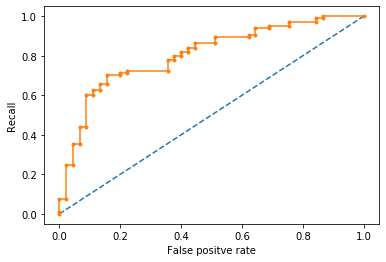

In [1188]:
auc = roc_auc_score(y_test, y_final_test_pred_proba)

print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(y_test, y_final_test_pred_proba)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker= '.')
plt.xlabel('False positve rate')
plt.ylabel('Recall')
plt.show()

### K-Nearest Neighbors

In [490]:
from sklearn.neighbors import KNeighborsClassifier

In [491]:
knn_base = KNeighborsClassifier()

In [492]:
knn_base.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [493]:
# testen mit Evaluation

y_eval_pred = knn_base.predict(X_eval)
y_eval_pred_proba = knn_base.predict_proba(X_eval)[:, 1]

# testen mit train

y_train_class = knn_base.predict(X_train)
y_train_proba = knn_base.predict_proba(X_train)[:, 1]

In [494]:
# eval score

print(roc_auc_score(y_eval, y_eval_pred_proba))
print(f1_score(y_eval, y_eval_pred))
print(accuracy_score(y_eval, y_eval_pred))
print(recall_score(y_eval, y_eval_pred))
print(precision_score(y_eval, y_eval_pred))

0.5695238095238095
0.7705627705627706
0.6466666666666666
0.8476190476190476
0.7063492063492064


In [503]:
# train score

print(roc_auc_score(y_train, y_train_proba))
print(f1_score(y_train, y_train_class))
print(accuracy_score(y_train, y_train_class))
print(recall_score(y_train, y_train_class))
print(precision_score(y_train, y_train_class))

0.8064723032069971
0.8491620111731844
0.7685714285714286
0.9306122448979591
0.7808219178082192


In [504]:
accuracy_score(y_eval, y_eval_pred)

0.6466666666666666

In [505]:
# report

y_final_test_pred = knn_base.predict(X_test)

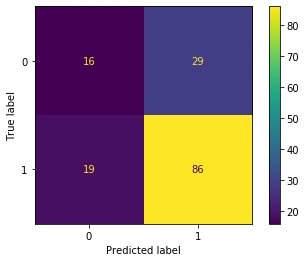

In [506]:
plot_confusion_matrix(knn_base, X_test, y_test)

In [507]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.46      0.36      0.40        45
           1       0.75      0.82      0.78       105

    accuracy                           0.68       150
   macro avg       0.60      0.59      0.59       150
weighted avg       0.66      0.68      0.67       150



In [500]:
y_final_test_pred_proba = knn_base.predict_proba(X_test)[:, 1]

In [501]:
roc_auc_score(y_test, y_final_test_pred_proba)

0.655978835978836

AUC - Test Set: 65.60%


<function matplotlib.pyplot.show(*args, **kw)>

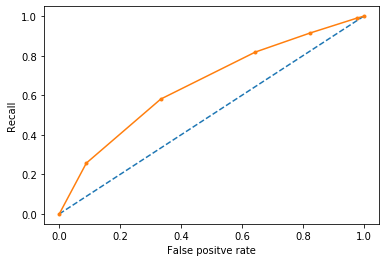

In [502]:
auc = roc_auc_score(y_test, y_final_test_pred_proba)

print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(y_test, y_final_test_pred_proba)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker= '.')
plt.xlabel('False positve rate')
plt.ylabel('Recall')
plt.show

### SVM

In [518]:
from sklearn.svm import SVC

In [519]:
svm_base = SVC(kernel='linear',probability= True)

In [520]:
svm_base.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [521]:
# testen mit Evaluation

y_eval_pred =svm_base.predict(X_eval)
y_eval_pred_proba = svm_base.predict_proba(X_eval)[:, 1]

# testen mit train

y_train_class = svm_base.predict(X_train)
y_train_proba = svm_base.predict_proba(X_train)[:, 1]

In [522]:
# eval score

print(roc_auc_score(y_eval, y_eval_pred_proba))
print(f1_score(y_eval, y_eval_pred))
print(accuracy_score(y_eval, y_eval_pred))
print(recall_score(y_eval, y_eval_pred))
print(precision_score(y_eval, y_eval_pred))

0.7779894179894179
0.858447488584475
0.7933333333333333
0.8952380952380953
0.8245614035087719


In [523]:
# train score

print(roc_auc_score(y_train, y_train_proba))
print(f1_score(y_train, y_train_class))
print(accuracy_score(y_train, y_train_class))
print(recall_score(y_train, y_train_class))
print(precision_score(y_train, y_train_class))

0.7782604470359572
0.834817012858556
0.7614285714285715
0.8612244897959184
0.8099808061420346


In [524]:
accuracy_score(y_eval, y_eval_pred)

0.7933333333333333

In [525]:
# report

y_final_test_pred = svm_base.predict(X_test)

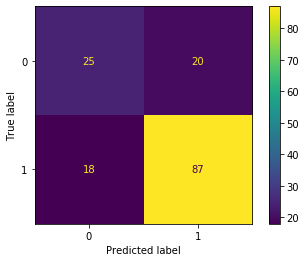

In [526]:
plot_confusion_matrix(svm_base, X_test, y_test)

In [527]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.58      0.56      0.57        45
           1       0.81      0.83      0.82       105

    accuracy                           0.75       150
   macro avg       0.70      0.69      0.69       150
weighted avg       0.74      0.75      0.74       150



In [528]:
y_final_test_pred_proba = svm_base.predict_proba(X_test)[:, 1]

In [529]:
roc_auc_score(y_test, y_final_test_pred_proba)

0.7674074074074074

AUC - Test Set: 76.74%


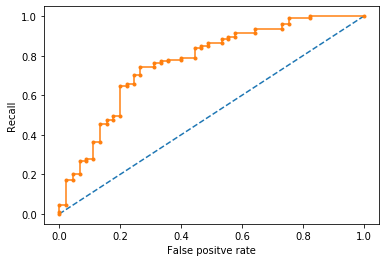

In [531]:
auc = roc_auc_score(y_test, y_final_test_pred_proba)

print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(y_test, y_final_test_pred_proba)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker= '.')
plt.xlabel('False positve rate')
plt.ylabel('Recall')
plt.show()

## Version

- numerisch Features skaliert werden

In [1353]:
categorical_columns = ['laufkont', 'moral', 'verw', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb']

numerical_columns = ['laufzeit', 'hoehe', 'alter', 'zahlung pro monat']

X_cat = df[categorical_columns]
X_num = df[numerical_columns].values

In [1354]:
X_num

array([[1.80000000e+01, 1.04900000e+03, 2.10000000e+01, 5.82777778e+01],
       [9.00000000e+00, 2.79900000e+03, 3.60000000e+01, 3.11000000e+02],
       [1.20000000e+01, 8.41000000e+02, 2.30000000e+01, 7.00833333e+01],
       ...,
       [2.10000000e+01, 1.26800000e+04, 3.00000000e+01, 6.03809524e+02],
       [1.20000000e+01, 6.46800000e+03, 5.20000000e+01, 5.39000000e+02],
       [3.00000000e+01, 6.35000000e+03, 3.10000000e+01, 2.11666667e+02]])

In [1355]:
X = np.hstack((X_cat, X_num))

In [1356]:
X[ :,-4:]

array([[1.80000000e+01, 1.04900000e+03, 2.10000000e+01, 5.82777778e+01],
       [9.00000000e+00, 2.79900000e+03, 3.60000000e+01, 3.11000000e+02],
       [1.20000000e+01, 8.41000000e+02, 2.30000000e+01, 7.00833333e+01],
       ...,
       [2.10000000e+01, 1.26800000e+04, 3.00000000e+01, 6.03809524e+02],
       [1.20000000e+01, 6.46800000e+03, 5.20000000e+01, 5.39000000e+02],
       [3.00000000e+01, 6.35000000e+03, 3.10000000e+01, 2.11666667e+02]])

In [1357]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=42, stratify= y)

In [1358]:
X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42, stratify= y_other)

In [1359]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [1360]:
scaler = StandardScaler()
X_train[:, -4:] = scaler.fit_transform(X_train[:, -4:])

In [1361]:
X_eval[:, -4:] = scaler.transform(X_eval[:, -4:])

In [1362]:
X_test[:, -4:] = scaler.transform(X_test[:, -4:])

In [127]:
########### zu 3.Version für Cross Validation #########

### Logit v2

In [560]:
from sklearn.linear_model import LogisticRegression

logit_v2 = LogisticRegression(max_iter=1000)

In [561]:
logit_v2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [562]:

# testen mit Evaluation

y_eval_pred = logit_v2.predict(X_eval)
y_eval_pred_proba = logit_v2.predict_proba(X_eval)[:, 1]

# testen mit train

y_train_class = logit_v2.predict(X_train)
y_train_proba = logit_v2.predict_proba(X_train)[:, 1]

In [563]:
# eval score

print(roc_auc_score(y_eval, y_eval_pred_proba))
print(f1_score(y_eval, y_eval_pred))
print(accuracy_score(y_eval, y_eval_pred))
print(recall_score(y_eval, y_eval_pred))
print(precision_score(y_eval, y_eval_pred))

0.7894179894179895
0.8648648648648648
0.8
0.9142857142857143
0.8205128205128205


In [564]:
# train score

print(roc_auc_score(y_train, y_train_proba))
print(f1_score(y_train, y_train_class))
print(accuracy_score(y_train, y_train_class))
print(recall_score(y_train, y_train_class))
print(precision_score(y_train, y_train_class))

0.8011564625850343
0.8465204957102002
0.77
0.9061224489795918
0.7942754919499105


In [565]:
# report

y_final_test_pred = logit_v2.predict(X_test)

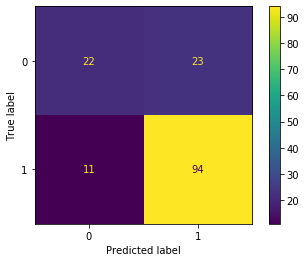

In [566]:
plot_confusion_matrix(logit_v2, X_test, y_test)

In [567]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.49      0.56        45
           1       0.80      0.90      0.85       105

    accuracy                           0.77       150
   macro avg       0.74      0.69      0.71       150
weighted avg       0.76      0.77      0.76       150



In [568]:
y_final_test_pred_proba = logit_v2.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_final_test_pred_proba)

0.808888888888889

AUC - Test Set: 80.89%


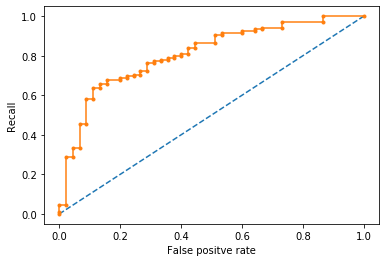

In [570]:
auc = roc_auc_score(y_test, y_final_test_pred_proba)

print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(y_test, y_final_test_pred_proba)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker= '.')
plt.xlabel('False positve rate')
plt.ylabel('Recall')
plt.show()

### KNN v2

In [589]:
from sklearn.neighbors import KNeighborsClassifier

knn_v2 = KNeighborsClassifier()

In [590]:
knn_v2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [591]:

# testen mit Evaluation

y_eval_pred = knn_v2.predict(X_eval)
y_eval_pred_proba = knn_v2.predict_proba(X_eval)[:, 1]

# testen mit train

y_train_class = knn_v2.predict(X_train)
y_train_proba = knn_v2.predict_proba(X_train)[:, 1]

In [592]:
# eval score

print(roc_auc_score(y_eval, y_eval_pred_proba))
print(f1_score(y_eval, y_eval_pred))
print(accuracy_score(y_eval, y_eval_pred))
print(recall_score(y_eval, y_eval_pred))
print(precision_score(y_eval, y_eval_pred))

0.7221164021164022
0.8510638297872339
0.7666666666666667
0.9523809523809523
0.7692307692307693


In [593]:
# train score

print(roc_auc_score(y_train, y_train_proba))
print(f1_score(y_train, y_train_class))
print(accuracy_score(y_train, y_train_class))
print(recall_score(y_train, y_train_class))
print(precision_score(y_train, y_train_class))

0.8827162293488824
0.8812915479582146
0.8214285714285714
0.9469387755102041
0.8241563055062167


In [594]:
accuracy_score(y_eval, y_eval_pred)

0.7666666666666667

In [595]:
# report

y_final_test_pred = knn_v2.predict(X_test)

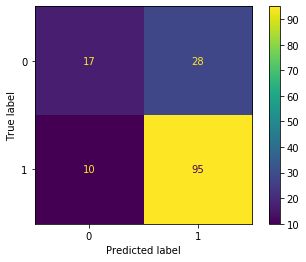

In [596]:
plot_confusion_matrix(knn_v2, X_test, y_test)

In [597]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.63      0.38      0.47        45
           1       0.77      0.90      0.83       105

    accuracy                           0.75       150
   macro avg       0.70      0.64      0.65       150
weighted avg       0.73      0.75      0.72       150



In [598]:
y_final_test_pred_proba = knn_v2.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_final_test_pred_proba)

0.7427513227513228

AUC - Test Set: 74.28%


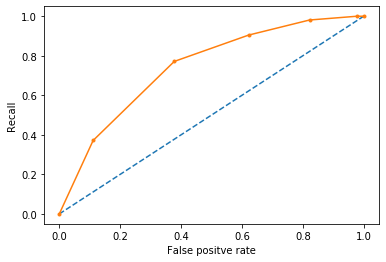

In [599]:
auc = roc_auc_score(y_test, y_final_test_pred_proba)

print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(y_test, y_final_test_pred_proba)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker= '.')
plt.xlabel('False positve rate')
plt.ylabel('Recall')
plt.show()

### SVM v2

In [617]:
from sklearn.svm import SVC

svm_v2 = SVC(kernel='linear',probability= True)

In [618]:
svm_v2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [619]:
y_eval_pred = svm_v2.predict(X_eval)


# testen mit Evaluation

y_eval_pred = svm_v2.predict(X_eval)
y_eval_pred_proba = svm_v2.predict_proba(X_eval)[:, 1]

# testen mit train

y_train_class = svm_v2.predict(X_train)
y_train_proba = svm_v2.predict_proba(X_train)[:, 1]

In [620]:
# eval score

print(roc_auc_score(y_eval, y_eval_pred_proba))
print(f1_score(y_eval, y_eval_pred))
print(accuracy_score(y_eval, y_eval_pred))
print(recall_score(y_eval, y_eval_pred))
print(precision_score(y_eval, y_eval_pred))

0.7868783068783068
0.857142857142857
0.7866666666666666
0.9142857142857143
0.8067226890756303


In [621]:
# train score

print(roc_auc_score(y_train, y_train_proba))
print(f1_score(y_train, y_train_class))
print(accuracy_score(y_train, y_train_class))
print(recall_score(y_train, y_train_class))
print(precision_score(y_train, y_train_class))

0.7976239067055394
0.8415094339622642
0.76
0.9102040816326531
0.7824561403508772


In [622]:
accuracy_score(y_eval, y_eval_pred)

0.7866666666666666

In [623]:
# report

y_final_test_pred = svm_v2.predict(X_test)

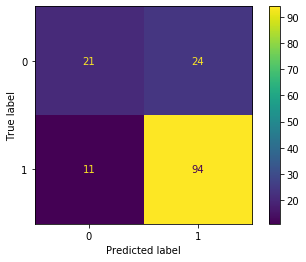

In [624]:
plot_confusion_matrix(svm_v2, X_test, y_test)

In [625]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.66      0.47      0.55        45
           1       0.80      0.90      0.84       105

    accuracy                           0.77       150
   macro avg       0.73      0.68      0.69       150
weighted avg       0.75      0.77      0.75       150



In [626]:
y_final_test_pred_proba = svm_v2.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_final_test_pred_proba)

0.808042328042328

AUC - Test Set: 80.80%


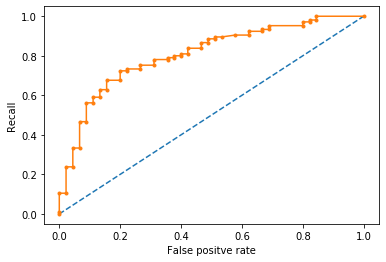

In [627]:
auc = roc_auc_score(y_test, y_final_test_pred_proba)

print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(y_test, y_final_test_pred_proba)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker= '.')
plt.xlabel('False positve rate')
plt.ylabel('Recall')
plt.show()

## Cross Validation
- CV wird benutzt
- skaliert werden

In [1284]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score, StratifiedKFold


kFoldCV = StratifiedKFold(n_splits=10,shuffle=True,random_state=4)

In [1238]:
######## zu 4.Version für GridSearchCV #########

### Logit v3

In [1239]:
from sklearn.linear_model import LogisticRegression

logit_v3 = LogisticRegression(max_iter=1000)

In [1240]:
scores_log = cross_validate(logit_v3, X_train, y_train, 
                        scoring=['precision','recall','f1','roc_auc','accuracy'],
                        cv= kFoldCV)

In [1241]:
scores_log = pd.DataFrame(scores)

In [1242]:
scores_log

,fit_time,score_time,test_precision,test_recall,test_f1,test_roc_auc,test_accuracy
0,0.021941,0.002992,0.735849,0.795918,0.764706,0.718173,0.657143
1,0.017952,0.002992,0.785714,0.897959,0.838095,0.760933,0.757143
2,0.018949,0.001995,0.803922,0.836735,0.820000,0.716229,0.742857
3,0.019946,0.002992,0.719298,0.836735,0.773585,0.657920,0.657143
4,0.015957,0.002992,0.830189,0.897959,0.862745,0.879495,0.800000
5,0.018949,0.002992,0.770492,0.959184,0.854545,0.758989,0.771429
6,0.013963,0.002992,0.750000,0.857143,0.800000,0.768707,0.700000
7,0.017952,0.001994,0.775862,0.918367,0.841121,0.841594,0.757143
8,0.016955,0.001994,0.803571,0.918367,0.857143,0.789116,0.785714
9,0.016955,0.001995,0.810345,0.959184,0.878505,0.827988,0.814286


In [1243]:
scores_log.mean()

fit_time          0.017952
score_time        0.002593
test_precision    0.778524
test_recall       0.887755
test_f1           0.829045
test_roc_auc      0.771914
test_accuracy     0.744286
dtype: float64

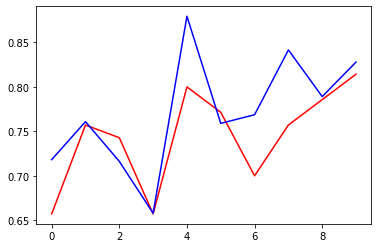

In [1219]:
plt.plot(scores['test_accuracy'],color='r',label='Accuracy')
plt.plot(scores['test_roc_auc'],color='b', label ='AUC')

### KNN v3

In [1262]:
from sklearn.neighbors import KNeighborsClassifier

knn_v3 = KNeighborsClassifier()

In [1263]:
scores_knn = cross_validate(knn_v3, X_train, y_train, 
                        scoring=['precision','recall','f1','roc_auc','accuracy'],
                        cv= kFoldCV)

In [1264]:
scores_knn = pd.DataFrame(scores)

In [1265]:
scores_knn

,fit_time,score_time,test_precision,test_recall,test_f1,test_roc_auc,test_accuracy
0,0.021941,0.002992,0.735849,0.795918,0.764706,0.718173,0.657143
1,0.017952,0.002992,0.785714,0.897959,0.838095,0.760933,0.757143
2,0.018949,0.001995,0.803922,0.836735,0.820000,0.716229,0.742857
3,0.019946,0.002992,0.719298,0.836735,0.773585,0.657920,0.657143
4,0.015957,0.002992,0.830189,0.897959,0.862745,0.879495,0.800000
5,0.018949,0.002992,0.770492,0.959184,0.854545,0.758989,0.771429
6,0.013963,0.002992,0.750000,0.857143,0.800000,0.768707,0.700000
7,0.017952,0.001994,0.775862,0.918367,0.841121,0.841594,0.757143
8,0.016955,0.001994,0.803571,0.918367,0.857143,0.789116,0.785714
9,0.016955,0.001995,0.810345,0.959184,0.878505,0.827988,0.814286


In [1266]:
scores_knn.mean()

fit_time          0.017952
score_time        0.002593
test_precision    0.778524
test_recall       0.887755
test_f1           0.829045
test_roc_auc      0.771914
test_accuracy     0.744286
dtype: float64

### SVM v3

In [1285]:
from sklearn.svm import SVC

svm_v3 = SVC(kernel='linear',probability= True)

In [1286]:
scores_svm = cross_validate(svm_v3, X_train, y_train, 
                        scoring=['precision','recall','f1','roc_auc','accuracy'],
                        cv= kFoldCV)

In [1287]:
scores_svm = pd.DataFrame(scores)

In [1288]:
scores_svm

,fit_time,score_time,test_precision,test_recall,test_f1,test_roc_auc,test_accuracy
0,0.021941,0.002992,0.735849,0.795918,0.764706,0.718173,0.657143
1,0.017952,0.002992,0.785714,0.897959,0.838095,0.760933,0.757143
2,0.018949,0.001995,0.803922,0.836735,0.820000,0.716229,0.742857
3,0.019946,0.002992,0.719298,0.836735,0.773585,0.657920,0.657143
4,0.015957,0.002992,0.830189,0.897959,0.862745,0.879495,0.800000
5,0.018949,0.002992,0.770492,0.959184,0.854545,0.758989,0.771429
6,0.013963,0.002992,0.750000,0.857143,0.800000,0.768707,0.700000
7,0.017952,0.001994,0.775862,0.918367,0.841121,0.841594,0.757143
8,0.016955,0.001994,0.803571,0.918367,0.857143,0.789116,0.785714
9,0.016955,0.001995,0.810345,0.959184,0.878505,0.827988,0.814286


In [1290]:
scores_svm.mean()

fit_time          0.017952
score_time        0.002593
test_precision    0.778524
test_recall       0.887755
test_f1           0.829045
test_roc_auc      0.771914
test_accuracy     0.744286
dtype: float64

### Cross Validation Visualization

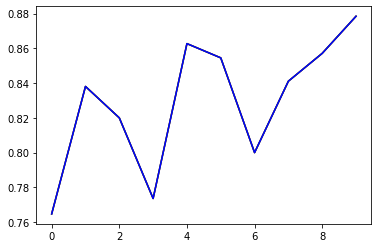

In [1295]:
plt.plot(scores_log['test_f1'],color='r',label='Logit')
plt.plot(scores_knn['test_f1'],color='g', label ='KNN')
plt.plot(scores_svm['test_f1'],color='b', label ='SVM')

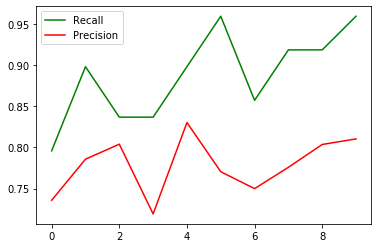

In [1303]:
#plt.plot(scores_log['test_accuracy'],color='r',label='Accuracy')
#plt.plot(scores_log['test_roc_auc'],color='b', label ='AUC')
plt.plot(scores_log['test_recall'],color='g', label ='Recall')
plt.plot(scores_log['test_precision'],color='r', label ='Precision')
plt.legend()

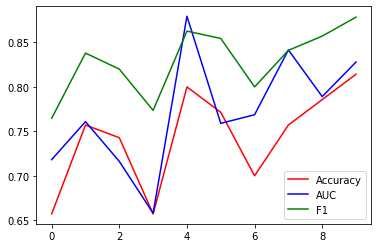

In [1300]:
plt.plot(scores_knn['test_accuracy'],color='r',label='Accuracy')
plt.plot(scores_knn['test_roc_auc'],color='b', label ='AUC')
plt.plot(scores_knn['test_f1'],color='g', label ='F1')
plt.legend()

## GridSearchCV

In [1363]:
kFoldCV = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

from sklearn.metrics import make_scorer

### Logit v4

In [181]:
param_test_logit = {'C':np.linspace(0.1,5.0),
             'solver':['newton-cg', 'lbfgs', 'sag', 'saga','liblinear'],
             'penalty':['l1','l2']
             }

In [182]:
from sklearn.linear_model import LogisticRegression

logit_grid = LogisticRegression(max_iter=1000)

#### Accuracy

In [183]:
from sklearn.model_selection import GridSearchCV


grid_model_logit = GridSearchCV(estimator = logit_grid,
                               param_grid = param_test_logit,
                               cv = kFoldCV,
                               scoring = 'accuracy',
                               verbose = 2,
                               n_jobs= -1)

In [184]:
grid_model_logit.fit(X_train, y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1864 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 4981 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   14.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecate...
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4

In [425]:
grid_model_logit.best_estimator_

LogisticRegression(C=0.6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [426]:
#best params for accuracy

grid_model_logit.best_params_

{'C': 0.6, 'penalty': 'l2', 'solver': 'newton-cg'}

In [427]:
#best score for accuracy

grid_model_logit.best_params_, grid_model_logit.best_score_

({'C': 0.6, 'penalty': 'l2', 'solver': 'newton-cg'}, 0.7528571428571429)

In [428]:
cv_log = pd.DataFrame(grid_model_logit.cv_results_)

In [457]:
cv_log.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_penalty', 'param_solver', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [458]:
cv_log

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000698,0.000457,0.000000,0.000000,0.1,l1,newton-cg,"{'C': 0.1, 'penalty': 'l1', 'solver': 'newton-...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500
1,0.000399,0.000489,0.000000,0.000000,0.1,l1,lbfgs,"{'C': 0.1, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360
2,0.000598,0.000489,0.000000,0.000000,0.1,l1,sag,"{'C': 0.1, 'penalty': 'l1', 'solver': 'sag'}",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,364
3,0.040790,0.003040,0.000199,0.000399,0.1,l1,saga,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}",0.742857,0.828571,...,0.700000,0.728571,0.728571,0.685714,0.771429,0.828571,0.700000,0.744286,0.048001,304
4,0.001995,0.000631,0.000299,0.000457,0.1,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.728571,0.828571,...,0.685714,0.757143,0.742857,0.685714,0.814286,0.800000,0.671429,0.742857,0.053452,312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.009774,0.000746,0.000299,0.000457,5,l2,newton-cg,"{'C': 5.0, 'penalty': 'l2', 'solver': 'newton-...",0.742857,0.857143,...,0.714286,0.785714,0.714286,0.671429,0.742857,0.800000,0.671429,0.750000,0.057232,145
496,0.012621,0.000807,0.000199,0.000399,5,l2,lbfgs,"{'C': 5.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.742857,0.857143,...,0.714286,0.785714,0.714286,0.671429,0.742857,0.800000,0.671429,0.750000,0.057232,145
497,0.029720,0.001323,0.000299,0.000457,5,l2,sag,"{'C': 5.0, 'penalty': 'l2', 'solver': 'sag'}",0.742857,0.857143,...,0.714286,0.785714,0.728571,0.671429,0.742857,0.800000,0.671429,0.751429,0.056496,22
498,0.055552,0.001548,0.000299,0.000457,5,l2,saga,"{'C': 5.0, 'penalty': 'l2', 'solver': 'saga'}",0.742857,0.857143,...,0.714286,0.785714,0.728571,0.671429,0.742857,0.800000,0.671429,0.751429,0.056496,22


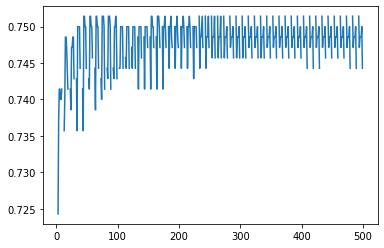

In [1345]:
plt.plot(cv_log['mean_test_score'])


In [747]:
y_final_test_pred = grid_model_logit.predict(X_test)

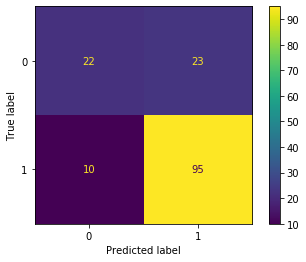

In [748]:
plot_confusion_matrix(grid_model_logit, X_test, y_test)

In [749]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.49      0.57        45
           1       0.81      0.90      0.85       105

    accuracy                           0.78       150
   macro avg       0.75      0.70      0.71       150
weighted avg       0.77      0.78      0.77       150



In [750]:
y_final_test_pred_proba = grid_model_logit.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_final_test_pred_proba)

0.8078306878306879

AUC - Test Set: 80.78%


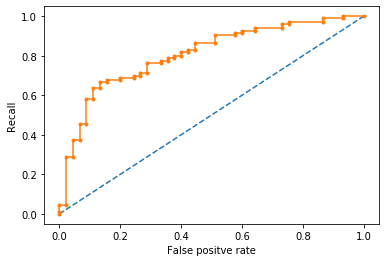

In [751]:
auc = roc_auc_score(y_test, y_final_test_pred_proba)

print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(y_test, y_final_test_pred_proba)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker= '.')
plt.xlabel('False positve rate')
plt.ylabel('Recall')
plt.show()

#### AUC

In [772]:
from sklearn.model_selection import GridSearchCV


grid_model_logit = GridSearchCV(estimator = logit_grid,
                               param_grid = param_test_logit,
                               cv = kFoldCV,
                               scoring = 'roc_auc',
                               verbose = 2,
                               n_jobs= -1)

In [773]:
grid_model_logit.fit(X_train, y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 2352 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 4616 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   28.6s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 

In [774]:
grid_model_logit.best_estimator_

LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [775]:
#best params for auc

grid_model_logit.best_params_

{'C': 2.0, 'penalty': 'l2', 'solver': 'lbfgs'}

In [776]:
#best score for auc

grid_model_logit.best_params_, grid_model_logit.best_score_

({'C': 2.0, 'penalty': 'l2', 'solver': 'lbfgs'}, 0.7706977202988224)

In [777]:
# pd.DataFrame(grid_model_logit.cv_results_)

In [778]:
#report 

y_final_test_pred = grid_model_logit.predict(X_test)


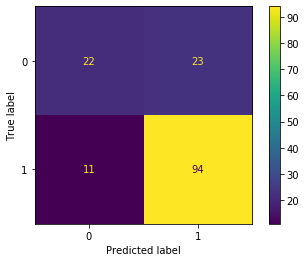

In [779]:
plot_confusion_matrix(grid_model_logit, X_test, y_test)

In [780]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.49      0.56        45
           1       0.80      0.90      0.85       105

    accuracy                           0.77       150
   macro avg       0.74      0.69      0.71       150
weighted avg       0.76      0.77      0.76       150



In [781]:
y_final_test_pred_proba = grid_model_logit.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_final_test_pred_proba)

0.8078306878306878

AUC - Test Set: 80.78%


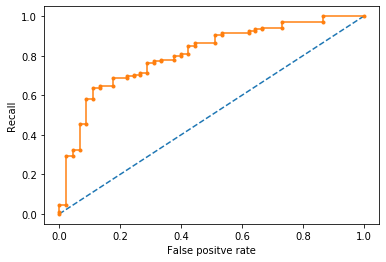

In [782]:
auc = roc_auc_score(y_test, y_final_test_pred_proba)

print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(y_test, y_final_test_pred_proba)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker= '.')
plt.xlabel('False positve rate')
plt.ylabel('Recall')
plt.show()

#### F1

In [803]:
from sklearn.model_selection import GridSearchCV


grid_model_logit = GridSearchCV(estimator = logit_grid,
                               param_grid = param_test_logit,
                               cv = kFoldCV,
                               scoring = 'f1',
                               verbose = 2,
                               n_jobs= -1)

In [804]:
grid_model_logit.fit(X_train, y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 4800 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   27.6s finished
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 

In [805]:
grid_model_logit.best_estimator_

LogisticRegression(C=2.4000000000000004, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [806]:
#best params for f1

grid_model_logit.best_params_

{'C': 2.4000000000000004, 'penalty': 'l1', 'solver': 'saga'}

In [807]:
#best score for f1

grid_model_logit.best_params_, grid_model_logit.best_score_

({'C': 2.4000000000000004, 'penalty': 'l1', 'solver': 'saga'},
 0.8335357913510784)

In [808]:
#report 

y_final_test_pred = grid_model_logit.predict(X_test)

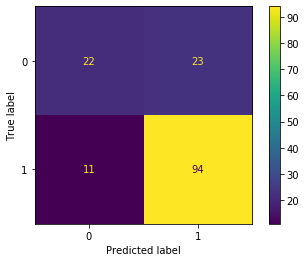

In [809]:
plot_confusion_matrix(grid_model_logit, X_test, y_test)

In [810]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.49      0.56        45
           1       0.80      0.90      0.85       105

    accuracy                           0.77       150
   macro avg       0.74      0.69      0.71       150
weighted avg       0.76      0.77      0.76       150



In [811]:
y_final_test_pred_proba = grid_model_logit.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_final_test_pred_proba)

0.8101587301587301

AUC - Test Set: 81.02%


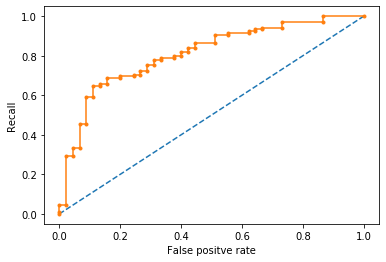

In [812]:
auc = roc_auc_score(y_test, y_final_test_pred_proba)

print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(y_test, y_final_test_pred_proba)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker= '.')
plt.xlabel('False positve rate')
plt.ylabel('Recall')
plt.show()

### KNN v4

#### Accuracy

In [861]:

from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsClassifier

In [862]:
param_test_knn = {
    'n_neighbors' : [3,5,7,9],
    'weights' : ['uniform','distance'],
    'p' : [1,2],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

In [863]:
knn_grid = KNeighborsClassifier()

In [864]:
from sklearn.model_selection import GridSearchCV


grid_model_knn = GridSearchCV(estimator = knn_grid,
                               param_grid = param_test_knn,
                               cv = kFoldCV,
                               scoring = 'accuracy',
                               verbose = 2,
                               n_jobs= -1)

In [865]:
grid_model_knn.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [866]:
grid_model_knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                     weights='distance')

In [867]:
#best params for accuracy

grid_model_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [868]:
#report 

y_final_test_pred = grid_model_knn.predict(X_test)

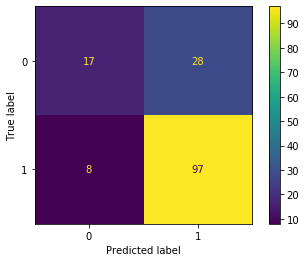

In [869]:
plot_confusion_matrix(grid_model_knn, X_test, y_test)

In [840]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.68      0.38      0.49        45
           1       0.78      0.92      0.84       105

    accuracy                           0.76       150
   macro avg       0.73      0.65      0.66       150
weighted avg       0.75      0.76      0.74       150



In [841]:
y_final_test_pred_proba = grid_model_knn.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_final_test_pred_proba)

0.7744973544973545

AUC - Test Set: 77.45%


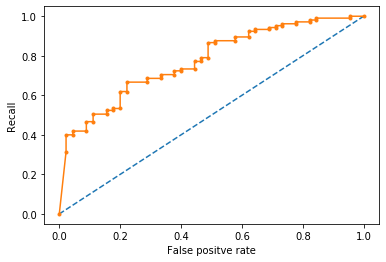

In [842]:
auc = roc_auc_score(y_test, y_final_test_pred_proba)

print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(y_test, y_final_test_pred_proba)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker= '.')
plt.xlabel('False positve rate')
plt.ylabel('Recall')
plt.show()

#### AUC

In [888]:

from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsClassifier

In [889]:
param_test_knn = {
    'n_neighbors' : [3,5,7,9],
    'weights' : ['uniform','distance'],
    'p' : [1,2],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

In [890]:
knn_grid = KNeighborsClassifier()

In [891]:
from sklearn.model_selection import GridSearchCV


grid_model_knn = GridSearchCV(estimator = knn_grid,
                               param_grid = param_test_knn,
                               cv = kFoldCV,
                               scoring = 'roc_auc',
                               verbose = 2,
                               n_jobs= -1)

In [892]:
grid_model_knn.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=2)

In [893]:
grid_model_knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='distance')

In [894]:
#best params for AUC

grid_model_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [895]:
#report 

y_final_test_pred = grid_model_knn.predict(X_test)

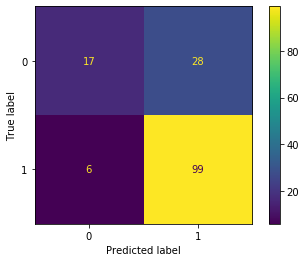

In [896]:
plot_confusion_matrix(grid_model_knn, X_test, y_test)

In [897]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.38      0.50        45
           1       0.78      0.94      0.85       105

    accuracy                           0.77       150
   macro avg       0.76      0.66      0.68       150
weighted avg       0.77      0.77      0.75       150



In [898]:
y_final_test_pred_proba = grid_model_knn.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_final_test_pred_proba)

0.7708994708994709

AUC - Test Set: 77.09%


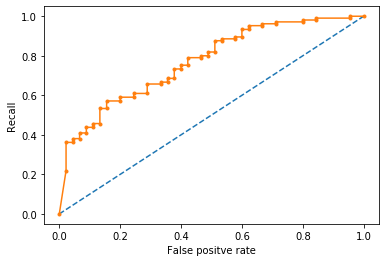

In [899]:
auc = roc_auc_score(y_test, y_final_test_pred_proba)

print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(y_test, y_final_test_pred_proba)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker= '.')
plt.xlabel('False positve rate')
plt.ylabel('Recall')
plt.show()

#### F1

In [918]:

from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsClassifier

In [919]:
param_test_knn = {
    'n_neighbors' : [3,5,7,9],
    'weights' : ['uniform','distance'],
    'p' : [1,2],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

In [920]:
knn_grid = KNeighborsClassifier()

In [921]:
from sklearn.model_selection import GridSearchCV


grid_model_knn = GridSearchCV(estimator = knn_grid,
                               param_grid = param_test_knn,
                               cv = kFoldCV,
                               scoring = 'f1',
                               verbose = 2,
                               n_jobs= -1)

In [922]:
grid_model_knn.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=2)

In [923]:
grid_model_knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                     weights='distance')

In [924]:
#best params for f1

grid_model_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [925]:
#report 

y_final_test_pred = grid_model_knn.predict(X_test)

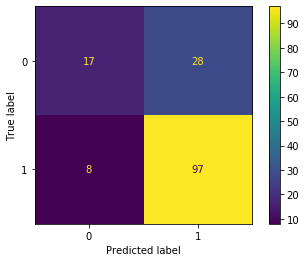

In [926]:
plot_confusion_matrix(grid_model_knn, X_test, y_test)

In [927]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.68      0.38      0.49        45
           1       0.78      0.92      0.84       105

    accuracy                           0.76       150
   macro avg       0.73      0.65      0.66       150
weighted avg       0.75      0.76      0.74       150



In [928]:
y_final_test_pred_proba = grid_model_knn.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_final_test_pred_proba)

0.7744973544973545

AUC - Test Set: 77.45%


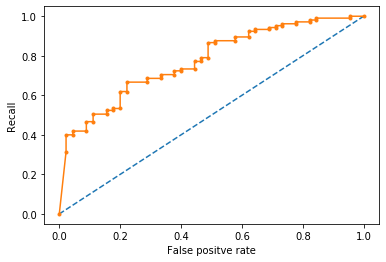

In [929]:
auc = roc_auc_score(y_test, y_final_test_pred_proba)

print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(y_test, y_final_test_pred_proba)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker= '.')
plt.xlabel('False positve rate')
plt.ylabel('Recall')
plt.show()

### SVM v4

#### Accuracy

In [948]:


from sklearn.svm import SVC

In [949]:
param_test_svc = {
    'kernel' : ['linear','rbf'],
    'C' : [1,10,100,1000],
    'gamma' : [1,0.1,0.001,0.0001]
}

In [950]:
svc_grid = SVC(probability = True, max_iter = 2000)

In [951]:
from sklearn.model_selection import GridSearchCV


grid_model_svc = GridSearchCV(estimator = svc_grid,
                               param_grid = param_test_svc,
                               cv = kFoldCV,
                               scoring = 'accuracy',
                               verbose = 2,
                               n_jobs= -1)

In [952]:
grid_model_svc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 305 out of 320 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    2.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=2000,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [953]:
grid_model_svc.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=2000, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [954]:
#best params for Accuracy

grid_model_svc.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [955]:
#report 

y_final_test_pred = grid_model_svc.predict(X_test)

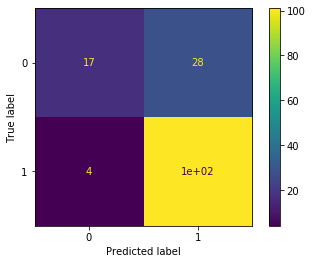

In [956]:
plot_confusion_matrix(grid_model_svc, X_test, y_test)

In [957]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.38      0.52        45
           1       0.78      0.96      0.86       105

    accuracy                           0.79       150
   macro avg       0.80      0.67      0.69       150
weighted avg       0.79      0.79      0.76       150



In [958]:
y_final_test_pred_proba = grid_model_svc.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_final_test_pred_proba)

0.8023280423280423

AUC - Test Set: 80.23%


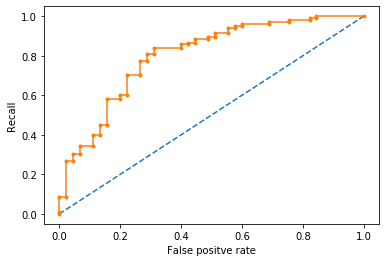

In [959]:
auc = roc_auc_score(y_test, y_final_test_pred_proba)

print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(y_test, y_final_test_pred_proba)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker= '.')
plt.xlabel('False positve rate')
plt.ylabel('Recall')
plt.show()

#### AUC

In [978]:


from sklearn.svm import SVC

In [979]:
param_test_svc = {
    'kernel' : ['linear','rbf'],
    'C' : [1,10,100,1000],
    'gamma' : [1,0.1,0.001,0.0001]
}

In [980]:
svc_grid = SVC(probability = True, max_iter = 2000)

In [981]:
from sklearn.model_selection import GridSearchCV


grid_model_svc = GridSearchCV(estimator = svc_grid,
                               param_grid = param_test_svc,
                               cv = kFoldCV,
                               scoring = 'roc_auc',
                               verbose = 2,
                               n_jobs= -1)

In [982]:
grid_model_svc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    2.2s finished
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=2000,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=2)

In [983]:
grid_model_svc.best_estimator_

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=2000, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [984]:
#best params for AUC

grid_model_svc.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [985]:
#report 

y_final_test_pred = grid_model_svc.predict(X_test)

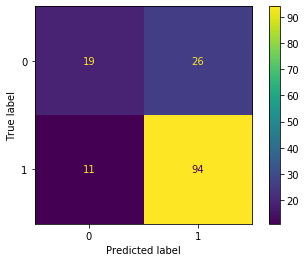

In [986]:
plot_confusion_matrix(grid_model_svc, X_test, y_test)

In [987]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.63      0.42      0.51        45
           1       0.78      0.90      0.84       105

    accuracy                           0.75       150
   macro avg       0.71      0.66      0.67       150
weighted avg       0.74      0.75      0.74       150



In [988]:
y_final_test_pred_proba = grid_model_svc.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_final_test_pred_proba)

0.8215873015873015

AUC - Test Set: 82.16%


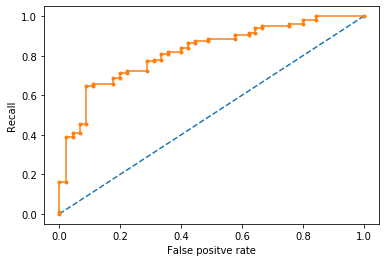

In [989]:
auc = roc_auc_score(y_test, y_final_test_pred_proba)

print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(y_test, y_final_test_pred_proba)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker= '.')
plt.xlabel('False positve rate')
plt.ylabel('Recall')
plt.show()

#### F1

In [1008]:


from sklearn.svm import SVC



In [1009]:
param_test_svc = {
    'kernel' : ['linear','rbf'],
    'C' : [1,10,100,1000],
    'gamma' : [1,0.1,0.001,0.0001]
}

In [1010]:
svc_grid = SVC(probability = True, max_iter = 2000)

In [1011]:
from sklearn.model_selection import GridSearchCV


grid_model_svc = GridSearchCV(estimator = svc_grid,
                               param_grid = param_test_svc,
                               cv = kFoldCV,
                               scoring = 'f1',
                               verbose = 2,
                               n_jobs= -1)

In [1012]:
grid_model_svc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 305 out of 320 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    2.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=2000,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=2)

In [1013]:
grid_model_svc.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=2000, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [1014]:
#best params for f1

grid_model_svc.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [1015]:
#report 

y_final_test_pred = grid_model_svc.predict(X_test)

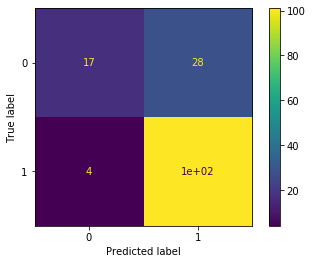

In [1016]:
plot_confusion_matrix(grid_model_svc, X_test, y_test)

In [1017]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.38      0.52        45
           1       0.78      0.96      0.86       105

    accuracy                           0.79       150
   macro avg       0.80      0.67      0.69       150
weighted avg       0.79      0.79      0.76       150



In [1018]:
y_final_test_pred_proba = grid_model_svc.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_final_test_pred_proba)

0.8023280423280423

AUC - Test Set: 80.23%


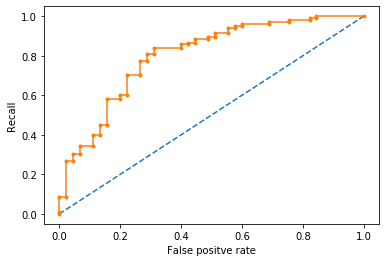

In [1019]:
auc = roc_auc_score(y_test, y_final_test_pred_proba)

print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(y_test, y_final_test_pred_proba)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker= '.')
plt.xlabel('False positve rate')
plt.ylabel('Recall')
plt.show()

### Manual Grid Search

In [1374]:
best_score = 0
param_test_svc = {
    'kernel' : ['linear','rbf'],
    'C' : [1,10,100,1000],
    'gamma' : [1,0.1,0.001,0.0001]
}

for gamma in [1,0.1,0.001,0.0001]:
    for C in [1,10,100,1000]:
        for kernel in ['linear','rbf']:
            svm_manual = SVC(gamma=gamma, C=C, kernel=kernel)
            #svm_manual.fit(X_train, y_train)
            scores = cross_val_score(svm_manual, X_train, y_train, cv=10)
            score = np.mean(scores)
            if score > best_score:
                best_score = score
                best_parameters = {'C': C, 'gamma': gamma, 'kernel':kernel}
svm_manual = SVC(**best_parameters)
svm_manual.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

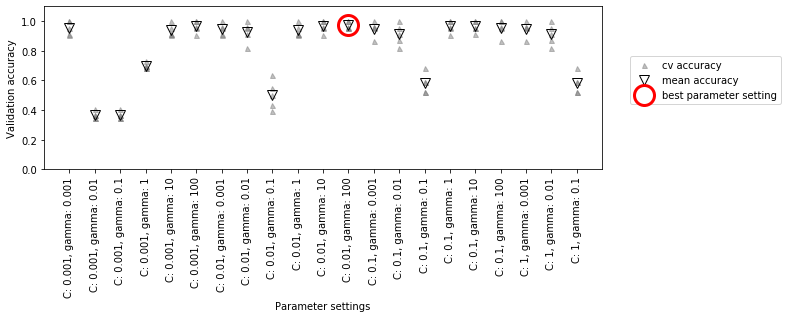

In [1375]:
import mglearn
mglearn.plots.plot_cross_val_selection()

In [1376]:
param_test_logit = {'C':np.linspace(0.1,5.0),
             'solver':['newton-cg', 'lbfgs', 'sag', 'saga','liblinear'],
             'penalty':['l1','l2']
             }

for penalty in ['l1','l2']:
    for C in np.linspace(0.1,5.0):
        for solver in ['newton-cg', 'lbfgs', 'sag', 'saga','liblinear']:
            logit_manual = LogisticRegression(solver=solver, C=C, penalty=penalty, max_iter =1000)
            #svm_manual.fit(X_train, y_train)
            scores = cross_val_score(logit_manual, X_train, y_train, cv=10, n_jobs=-1)
            score = np.mean(scores)
            if score > best_score:
                best_score = score
                best_parameters = {'solver':solver, 'C':C, 'penalty':penalty}
logit_manual = LogisticRegression(**best_parameters, max_iter=1000)
logit_manual.fit(X_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'gamma'

In [ ]:
import mglearn
mglearn.plots.plot_cross_val_selection()

## Validation Curve

In [1377]:
from sklearn.model_selection import validation_curve, learning_curve

In [ ]:
parameter_range = 

train_score, test_score = validation_curve(LogisticRegression(), X_train, y_train, 
                                       param_name = "n_neighbors", 
                                       param_range = parameter_range, 
                                        cv = 5, scoring = "accuracy") 

## Plot performance

### Var 1

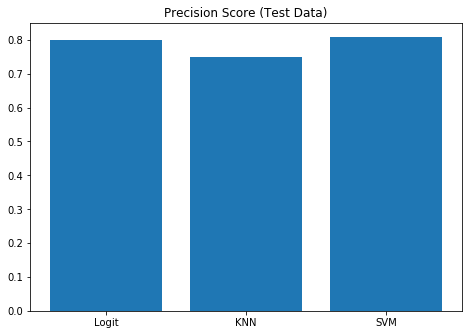

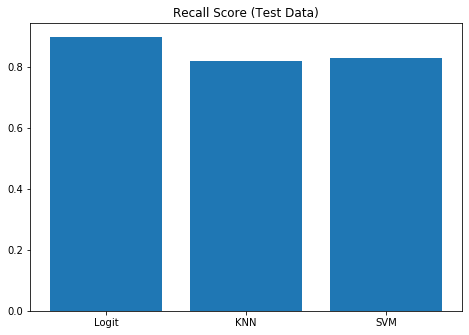

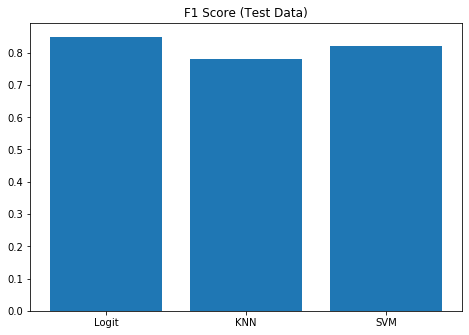

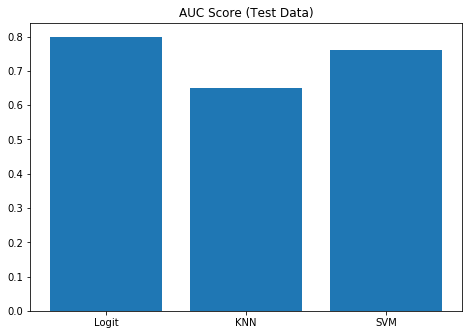

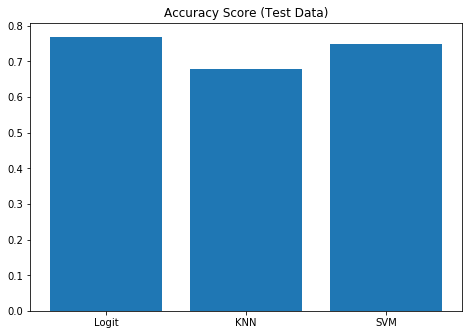

In [1158]:
data = [[0.80,0.75,0.81],
        [0.90, 0.82, 0.83],
        [0.85,0.78, 0.82],
        [0.80, 0.65, 0.76],
        [0.77,0.68,0.75]]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Precision Score (Test Data)')
models = ['Logit', 'KNN', 'SVM']
ax.bar(models, data[0])
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Recall Score (Test Data)')
models = ['Logit', 'KNN', 'SVM']
ax.bar(models, data[1])
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('F1 Score (Test Data)')
models = ['Logit', 'KNN', 'SVM']
ax.bar(models, data[2])
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('AUC Score (Test Data)')
models = ['Logit', 'KNN', 'SVM']
ax.bar(models, data[3])
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Accuracy Score (Test Data)')
models = ['Logit', 'KNN', 'SVM']
ax.bar(models, data[4])
plt.show()


### Var 2

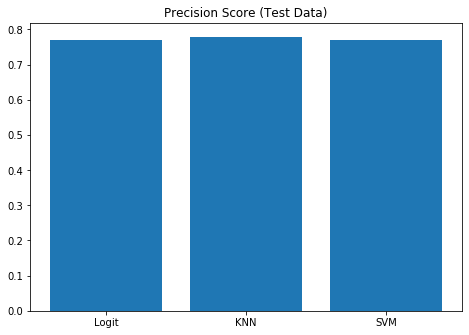

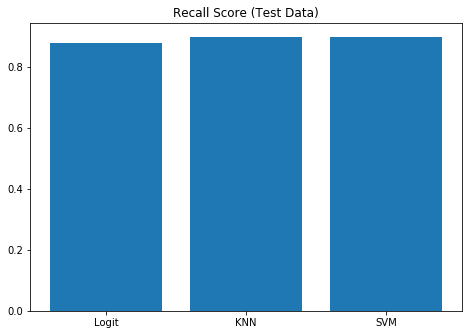

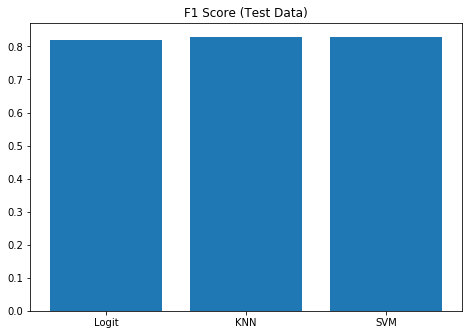

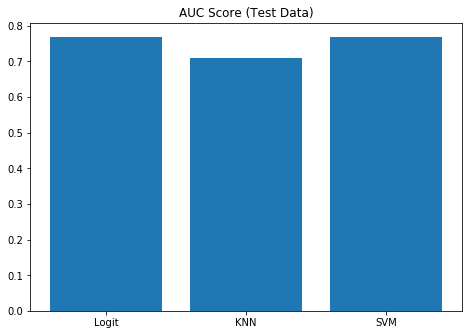

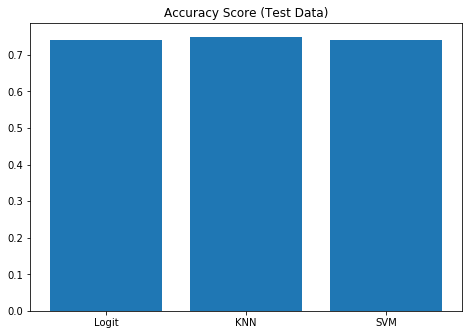

In [1159]:
# Val Score

data = [[0.77,0.78,0.77],
        [0.88, 0.90, 0.90],
        [0.82,0.83, 0.83],
        [0.77, 0.71, 0.77],
        [0.74,0.75,0.74]]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Precision Score (Test Data)')
models = ['Logit', 'KNN', 'SVM']
ax.bar(models, data[0])
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Recall Score (Test Data)')
models = ['Logit', 'KNN', 'SVM']
ax.bar(models, data[1])
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('F1 Score (Test Data)')
models = ['Logit', 'KNN', 'SVM']
ax.bar(models, data[2])
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('AUC Score (Test Data)')
models = ['Logit', 'KNN', 'SVM']
ax.bar(models, data[3])
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Accuracy Score (Test Data)')
models = ['Logit', 'KNN', 'SVM']
ax.bar(models, data[4])
plt.show()


### Var 4 GridSearchCV

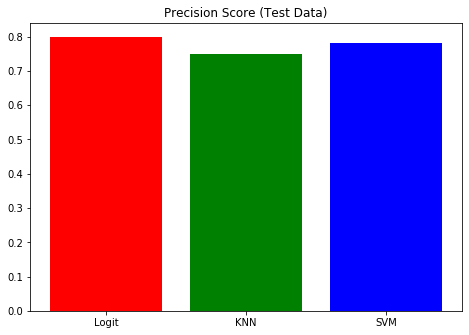

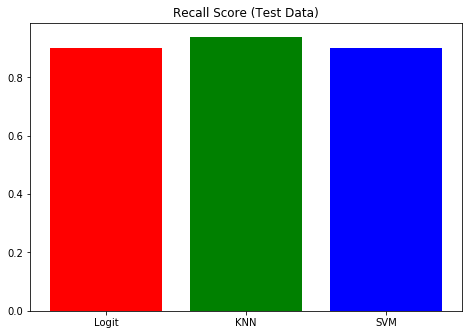

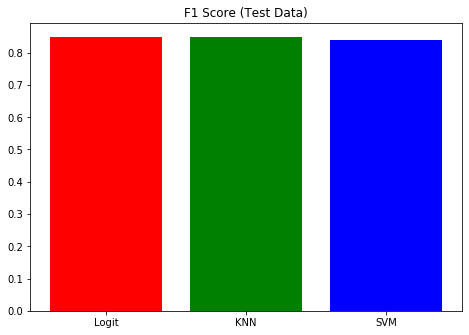

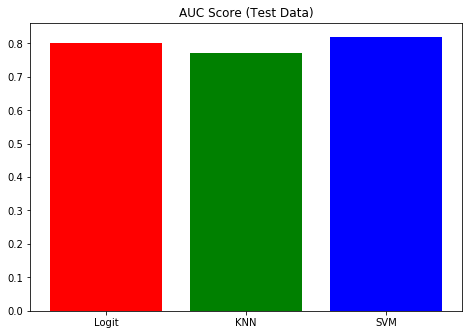

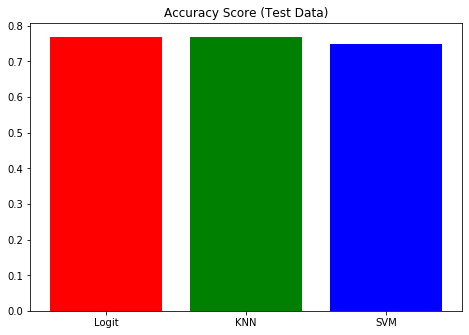

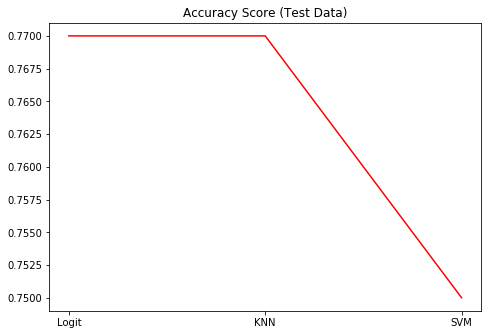

In [1380]:
data = [[0.80,0.75,0.78],
        [0.90, 0.94, 0.90],
        [0.85,0.85, 0.84],
        [0.80, 0.77, 0.82],
        [0.77,0.77,0.75]]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Precision Score (Test Data)')
models = ['Logit', 'KNN', 'SVM']
ax.bar(models, data[0], color=('r','g','b'))
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Recall Score (Test Data)')
models = ['Logit', 'KNN', 'SVM']
ax.bar(models, data[1], color=('r','g','b'))
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('F1 Score (Test Data)')
models = ['Logit', 'KNN', 'SVM']
ax.bar(models, data[2], color=('r','g','b'))
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('AUC Score (Test Data)')
models = ['Logit', 'KNN', 'SVM']
ax.bar(models, data[3], color=('r','g','b'))
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Accuracy Score (Test Data)')
models = ['Logit', 'KNN', 'SVM']
ax.bar(models, data[4], color=('r','g','b'))
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Accuracy Score (Test Data)')
models = ['Logit', 'KNN', 'SVM']
ax.plot(models, data[4],color ='r')

plt.show()

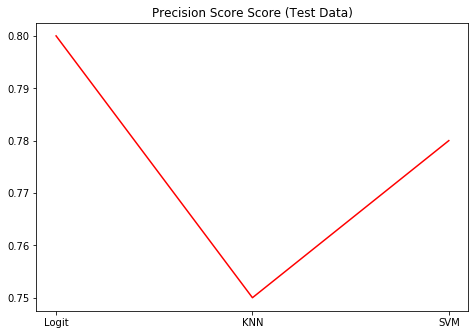

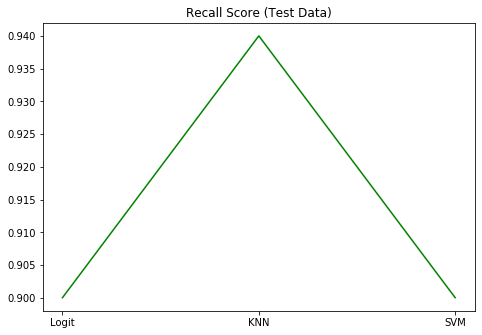

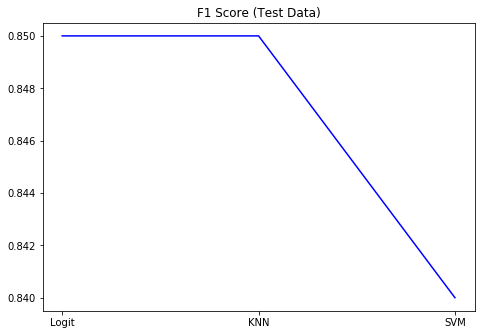

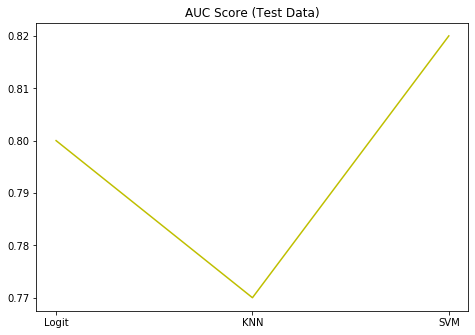

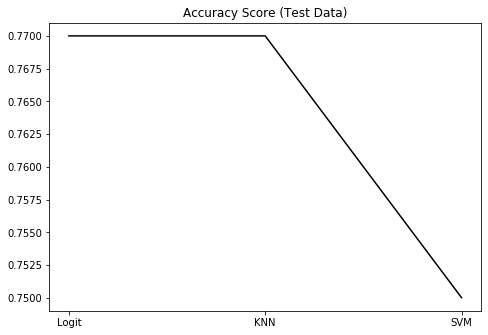

In [1384]:
data = [[0.80,0.75,0.78],
        [0.90, 0.94, 0.90],
        [0.85,0.85, 0.84],
        [0.80, 0.77, 0.82],
        [0.77,0.77,0.75]]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Precision Score Score (Test Data)')
models = ['Logit', 'KNN', 'SVM']
ax.plot(models, data[0],color ='r')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Recall Score (Test Data)')
models = ['Logit', 'KNN', 'SVM']
ax.plot(models, data[1],color ='g')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('F1 Score (Test Data)')
models = ['Logit', 'KNN', 'SVM']
ax.plot(models, data[2],color ='b')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('AUC Score (Test Data)')
models = ['Logit', 'KNN', 'SVM']
ax.plot(models, data[3],color ='y')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Accuracy Score (Test Data)')
models = ['Logit', 'KNN', 'SVM']
ax.plot(models, data[4],color ='black')
plt.show()


## Performance comparison

### Version 1 Standard

In [1]:
# BASELINE

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report, recall_score, precision_score, plot_roc_curve, roc_curve
from sklearn.metrics import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df_raw = pd.read_csv('kredit.csv')

In [3]:
df = df_raw.copy(deep=True)

In [4]:
X = df.drop('kredit', axis=1)
y = df['kredit']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)

In [6]:
clf_name = ['Logistic_Regression', 'KNN', 'SVM']

clf = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    SVC(kernel='linear',probability= True)   
]

auc_scores = []
f1_scores = []
accuracy_scores = []
recall_scores = []
precision_scores = []

for name, model in zip(clf_name, clf):
    model.fit(X_train, y_train)
    y_final_test_pred = model.predict(X_test)
    y_final_test_pred_proba = model.predict_proba(X_test)[:,1]
    auc_scores.append(roc_auc_score(y_test, y_final_test_pred_proba))
    f1_scores.append(f1_score(y_test, y_final_test_pred))
    accuracy_scores.append(accuracy_score(y_test, y_final_test_pred))
    recall_scores.append(recall_score(y_test, y_final_test_pred))
    precision_scores.append(precision_score(y_test, y_final_test_pred))
    
    conf_mat = confusion_matrix(y_test, y_final_test_pred)
    conf_mat

    TP = conf_mat[1, 1]
    TN = conf_mat[0, 0]
    FP = conf_mat[0, 1]
    FN = conf_mat[1, 0]
    
    #True positive rate / recall / sensitivity
    sensitivity = TP / float(FN + TP)

    #True negative rate / Specificity
    specificity = TN / (TN + FP)

    #False positive rate
    false_positive_rate = FP / float(TN + FP) 

    #False negative rate
    false_negative_rate = FN / float(FN + TP)
    print(name)
    print(conf_mat)
    print('Missclassification error rate:')
    print(1-accuracy_score(y_test, y_final_test_pred))
    print()
    print('False postive rate:')
    print(false_positive_rate)
    print()
    print('False negative rate:')
    print(false_negative_rate)
    print()
    print()


Logistic_Regression
Missclassification error rate:
0.21999999999999997

False postive rate:
0.5333333333333333

False negative rate:
0.08571428571428572


KNN
Missclassification error rate:
0.31666666666666665

False postive rate:
0.6888888888888889

False negative rate:
0.15714285714285714


SVM
Missclassification error rate:
0.22999999999999998

False postive rate:
0.45555555555555555

False negative rate:
0.13333333333333333




In [58]:
compare_v1 = pd.DataFrame()
compare_v1['Modell Name'] = clf_name
compare_v1['Precision'] = precision_scores
compare_v1['Recall'] = recall_scores
compare_v1['F1'] = f1_scores
compare_v1['AUC'] = auc_scores
compare_v1['Accuracy'] = accuracy_scores

compare_v1

,Modell Name,Precision,Recall,F1,AUC,Accuracy
0,Logistic_Regression,0.800000,0.914286,0.853333,0.793069,0.780000
1,KNN,0.740586,0.842857,0.788419,0.611534,0.683333
2,SVM,0.816143,0.866667,0.840647,0.776878,0.770000


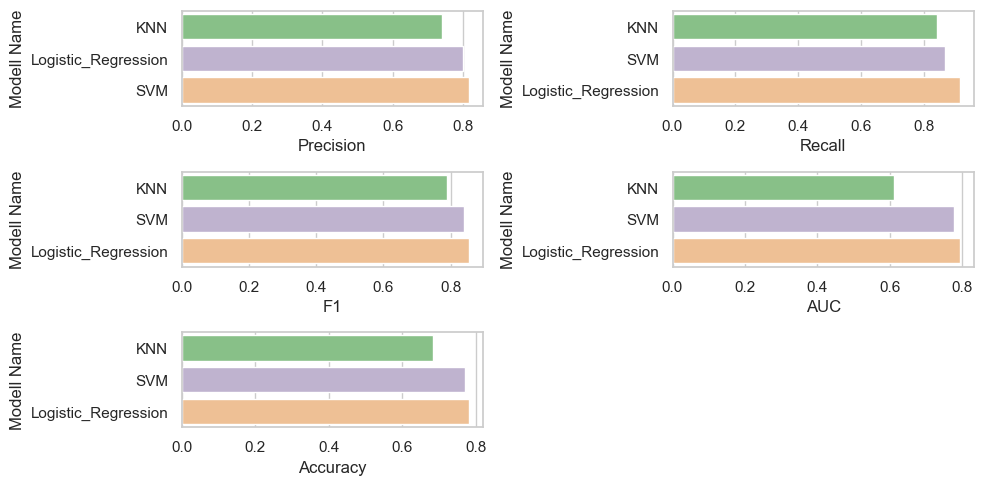

In [59]:
auc_sort = compare_v1.sort_values(by=['AUC'])
f1_sort = compare_v1.sort_values(by=['F1'])
rec_sort = compare_v1.sort_values(by=['Recall'])
pre_sort = compare_v1.sort_values(by=['Precision'])
acc_sort = compare_v1.sort_values(by=['Accuracy'])

fig, ax = plt.subplots(nrows=3, ncols=2, dpi=100, figsize=(10,5))
sns.set(style="whitegrid")

sns.barplot(y='Modell Name', x="Precision", data=pre_sort, palette="Accent", ax=ax[0][0])
sns.barplot(y='Modell Name', x="Recall", data=rec_sort, palette="Accent", ax=ax[0][1])
sns.barplot(y='Modell Name', x="F1", data=f1_sort, palette="Accent", ax=ax[1][0])
sns.barplot(y='Modell Name', x="AUC", data=auc_sort, palette="Accent", ax=ax[1][1])
sns.barplot(y='Modell Name', x="Accuracy", data=acc_sort, palette="Accent", ax=ax[2][0])
fig.delaxes(ax[2][1])
plt.tight_layout()
plt.show()

In [61]:
conf_mat = confusion_matrix(y_test, y_final_test_pred)
conf_mat

TP = conf_mat[1, 1]
TN = conf_mat[0, 0]
FP = conf_mat[0, 1]
FN = conf_mat[1, 0]

In [62]:
conf_mat

array([[ 49,  41],
       [ 28, 182]], dtype=int64)

In [66]:
#True positive rate / recall / sensitivity
sensitivity = TP / float(FN + TP)

#True negative rate / Specificity
specificity = TN / (TN + FP)

#False positive rate
false_positive_rate = FP / float(TN + FP) 

#False negative rate
false_negative_rate = FN / float(FN + TP)

print('Missclassification error rate:')
print(1-accuracy_score(y_test, y_final_test_pred))
print()
print('False postive rate:')
print(false_positive_rate)
print()
print('False negative rate:')
print(false_negative_rate)



Missclassification error rate:
0.22999999999999998

False postive rate:
0.45555555555555555

False negative rate:
0.13333333333333333


### Version 2 Scaled

In [7]:
# SCALED

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report, recall_score, precision_score, plot_roc_curve, roc_curve
from sklearn.metrics import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [8]:
df_raw = pd.read_csv('kredit.csv')
df = df_raw.copy(deep=True)

X = df.drop('kredit', axis=1)
y = df['kredit']

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
categorical_columns = ['laufkont', 'moral', 'verw', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb']

numerical_columns = ['laufzeit', 'hoehe', 'alter']

X_cat = df[categorical_columns]
X_num = df[numerical_columns].values

In [11]:
X = np.hstack((X_cat, X_num))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

scaler = StandardScaler()
X_train[:, -4:] = scaler.fit_transform(X_train[:, -4:])
X_test[:, -4:] = scaler.transform(X_test[:, -4:])

In [14]:

clf_name = ['Logistic_Regression', 'KNN', 'SVM']

clf = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    SVC(kernel='linear',probability= True)   
]

auc_scores = []
f1_scores = []
accuracy_scores = []
recall_scores = []
precision_scores = []

for name, model in zip(clf_name, clf):
    model.fit(X_train, y_train)
    y_final_test_pred = model.predict(X_test)
    y_final_test_pred_proba = model.predict_proba(X_test)[:,1]
    auc_scores.append(roc_auc_score(y_test, y_final_test_pred_proba))
    f1_scores.append(f1_score(y_test, y_final_test_pred))
    accuracy_scores.append(accuracy_score(y_test, y_final_test_pred))
    recall_scores.append(recall_score(y_test, y_final_test_pred))
    precision_scores.append(precision_score(y_test, y_final_test_pred))
    
    conf_mat = confusion_matrix(y_test, y_final_test_pred)
    conf_mat

    TP = conf_mat[1, 1]
    TN = conf_mat[0, 0]
    FP = conf_mat[0, 1]
    FN = conf_mat[1, 0]
    
    #True positive rate / recall / sensitivity
    sensitivity = TP / float(FN + TP)

    #True negative rate / Specificity
    specificity = TN / (TN + FP)

    #False positive rate
    false_positive_rate = FP / float(TN + FP) 

    #False negative rate
    false_negative_rate = FN / float(FN + TP)
    print(name)
    print(conf_mat)
    print('Missclassification error rate:')
    print(1-accuracy_score(y_test, y_final_test_pred))
    print()
    print('False postive rate:')
    print(false_positive_rate)
    print()
    print('False negative rate:')
    print(false_negative_rate)
    print()
    print()


Logistic_Regression
[[ 42  48]
 [ 17 193]]
Missclassification error rate:
0.21666666666666667

False postive rate:
0.5333333333333333

False negative rate:
0.08095238095238096


KNN
[[ 33  57]
 [ 13 197]]
Missclassification error rate:
0.23333333333333328

False postive rate:
0.6333333333333333

False negative rate:
0.06190476190476191


SVM
[[ 39  51]
 [ 18 192]]
Missclassification error rate:
0.22999999999999998

False postive rate:
0.5666666666666667

False negative rate:
0.08571428571428572




In [15]:
compare_v2 = pd.DataFrame()
compare_v2['Modell Name'] = clf_name
compare_v2['Precision'] = precision_scores
compare_v2['Recall'] = recall_scores
compare_v2['F1'] = f1_scores
compare_v2['AUC'] = auc_scores
compare_v2['Accuracy'] = accuracy_scores

compare_v2

,Modell Name,Precision,Recall,F1,AUC,Accuracy
0,Logistic_Regression,0.800830,0.919048,0.855876,0.801534,0.783333
1,KNN,0.775591,0.938095,0.849138,0.725661,0.766667
2,SVM,0.790123,0.914286,0.847682,0.806190,0.770000


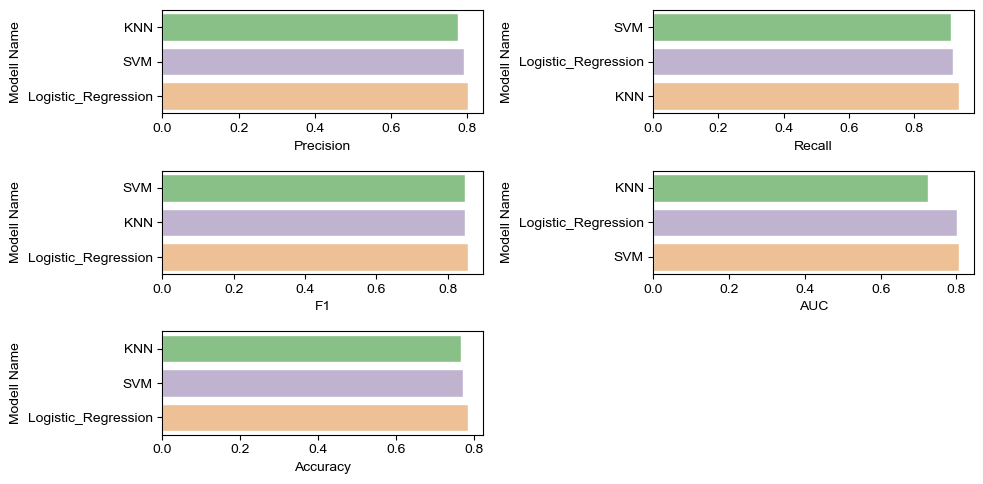

In [16]:
auc_sort = compare_v2.sort_values(by=['AUC'])
f1_sort = compare_v2.sort_values(by=['F1'])
rec_sort = compare_v2.sort_values(by=['Recall'])
pre_sort = compare_v2.sort_values(by=['Precision'])
acc_sort = compare_v2.sort_values(by=['Accuracy'])

fig, ax = plt.subplots(nrows=3, ncols=2, dpi=100, figsize=(10,5))
sns.set(style="whitegrid")

sns.barplot(y='Modell Name', x="Precision", data=pre_sort, palette="Accent", ax=ax[0][0])
sns.barplot(y='Modell Name', x="Recall", data=rec_sort, palette="Accent", ax=ax[0][1])
sns.barplot(y='Modell Name', x="F1", data=f1_sort, palette="Accent", ax=ax[1][0])
sns.barplot(y='Modell Name', x="AUC", data=auc_sort, palette="Accent", ax=ax[1][1])
sns.barplot(y='Modell Name', x="Accuracy", data=acc_sort, palette="Accent", ax=ax[2][0])
fig.delaxes(ax[2][1])
plt.tight_layout()
plt.show()

### Version 3 Holdout

In [88]:
# HOLDOUT TEST

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report, recall_score, precision_score, plot_roc_curve, roc_curve
from sklearn.metrics import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [89]:
df_raw = pd.read_csv('kredit.csv')
df = df_raw.copy(deep=True)

X = df.drop('kredit', axis=1)
y = df['kredit']

categorical_columns = ['laufkont', 'moral', 'verw', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb']

numerical_columns = ['laufzeit', 'hoehe', 'alter']

X_cat = df[categorical_columns]
X_num = df[numerical_columns].values

In [90]:
X = np.hstack((X_cat, X_num))

X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)
X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42, stratify = y_other)

from sklearn.preprocessing import OneHotEncoder, StandardScaler

scaler = StandardScaler()
X_train[:, -4:] = scaler.fit_transform(X_train[:, -4:])
X_eval[:, -4:] = scaler.transform(X_eval[:, -4:])
X_test[:, -4:] = scaler.transform(X_test[:, -4:])

In [34]:
##########################################################################################################

#### Logit

In [91]:

auc_scores = []
f1_scores = []
accuracy_scores = []
recall_scores = []
precision_scores = []

solver_param = []
c_param = []
pen_param = []

for solver in ['newton-cg', 'lbfgs', 'sag', 'saga','liblinear']:
    if solver == 'newton-cg' or solver =='sag' or solver=='lbfgs':
        for C in [1,2,3,4,5]:
            for penalty in ['l2']:
                    logit_manual = LogisticRegression(solver=solver, C=C, penalty=penalty, max_iter= 1000)
                    
                    logit_manual.fit(X_train, y_train)
                    y_final_test_pred = logit_manual.predict(X_eval)
                    y_final_test_pred_proba = logit_manual.predict_proba(X_eval)[:,1]
                    auc_scores.append(roc_auc_score(y_eval, y_final_test_pred_proba))
                    f1_scores.append(f1_score(y_eval, y_final_test_pred))
                    accuracy_scores.append(accuracy_score(y_eval, y_final_test_pred))
                    recall_scores.append(recall_score(y_eval, y_final_test_pred))
                    precision_scores.append(precision_score(y_eval, y_final_test_pred))
                    solver_param.append(solver)
                    c_param.append(C)
                    pen_param.append(penalty)
                    
                    conf_mat = confusion_matrix(y_eval, y_final_test_pred)
                    conf_mat

                    TP = conf_mat[1, 1]
                    TN = conf_mat[0, 0]
                    FP = conf_mat[0, 1]
                    FN = conf_mat[1, 0]

                    #True positive rate / recall / sensitivity
                    sensitivity = TP / float(FN + TP)

                    #True negative rate / Specificity
                    specificity = TN / (TN + FP)

                    #False positive rate
                    false_positive_rate = FP / float(TN + FP) 

                    #False negative rate
                    false_negative_rate = FN / float(FN + TP)
                    print('Solver: {}, C: {}, penalty: {}'.format(solver,C,penalty))
                    print(conf_mat)
                    print('Missclassification error rate:')
                    print(1-accuracy_score(y_eval, y_final_test_pred))
                    print()
                    print('False postive rate:')
                    print(false_positive_rate)
                    print()
                    print('False negative rate:')
                    print(false_negative_rate)
                    print()
                    print()
    else:
        for C in [1,2,3,4,5]:
            for penalty in ['l1','l2']:
                    logit_manual = LogisticRegression(solver=solver, C=C, penalty=penalty, max_iter= 1000)
                    
                    logit_manual.fit(X_train, y_train)
                    y_final_test_pred = logit_manual.predict(X_eval)
                    y_final_test_pred_proba = logit_manual.predict_proba(X_eval)[:,1]
                    auc_scores.append(roc_auc_score(y_eval, y_final_test_pred_proba))
                    f1_scores.append(f1_score(y_eval, y_final_test_pred))
                    accuracy_scores.append(accuracy_score(y_eval, y_final_test_pred))
                    recall_scores.append(recall_score(y_eval, y_final_test_pred))
                    precision_scores.append(precision_score(y_eval, y_final_test_pred))
                    solver_param.append(solver)
                    c_param.append(C)
                    pen_param.append(penalty)
                    
                    conf_mat = confusion_matrix(y_eval, y_final_test_pred)
                    conf_mat

                    TP = conf_mat[1, 1]
                    TN = conf_mat[0, 0]
                    FP = conf_mat[0, 1]
                    FN = conf_mat[1, 0]

                    #True positive rate / recall / sensitivity
                    sensitivity = TP / float(FN + TP)

                    #True negative rate / Specificity
                    specificity = TN / (TN + FP)

                    #False positive rate
                    false_positive_rate = FP / float(TN + FP) 

                    #False negative rate
                    false_negative_rate = FN / float(FN + TP)
                    print('Solver: {}, C: {}, penalty: {}'.format(solver,C,penalty))
                    print(conf_mat)
                    print('Missclassification error rate:')
                    print(1-accuracy_score(y_eval, y_final_test_pred))
                    print()
                    print('False postive rate:')
                    print(false_positive_rate)
                    print()
                    print('False negative rate:')
                    print(false_negative_rate)
                    print()
                    print()

Solver: newton-cg, C: 1, penalty: l2
[[24 21]
 [ 8 97]]
Missclassification error rate:
0.19333333333333336

False postive rate:
0.4666666666666667

False negative rate:
0.0761904761904762


Solver: newton-cg, C: 2, penalty: l2
[[24 21]
 [ 8 97]]
Missclassification error rate:
0.19333333333333336

False postive rate:
0.4666666666666667

False negative rate:
0.0761904761904762


Solver: newton-cg, C: 3, penalty: l2
[[24 21]
 [ 8 97]]
Missclassification error rate:
0.19333333333333336

False postive rate:
0.4666666666666667

False negative rate:
0.0761904761904762


Solver: newton-cg, C: 4, penalty: l2
[[24 21]
 [ 8 97]]
Missclassification error rate:
0.19333333333333336

False postive rate:
0.4666666666666667

False negative rate:
0.0761904761904762


Solver: newton-cg, C: 5, penalty: l2
[[24 21]
 [ 8 97]]
Missclassification error rate:
0.19333333333333336

False postive rate:
0.4666666666666667

False negative rate:
0.0761904761904762


Solver: lbfgs, C: 1, penalty: l2
[[24 21]
 [ 8 97]

In [92]:
from IPython.display import HTML


compare_v3_logit = pd.DataFrame()

compare_v3_logit.style.set_caption("SVM - Validation Set")
#compare_v3_svc['Modell Name'] = "SVM"
compare_v3_logit['Precision'] = precision_scores
compare_v3_logit['Recall'] = recall_scores
compare_v3_logit['F1'] = f1_scores
compare_v3_logit['AUC'] = auc_scores
compare_v3_logit['Accuracy'] = accuracy_scores
compare_v3_logit['Solver'] = solver_param
compare_v3_logit['C'] = c_param
compare_v3_logit['Penalty'] = pen_param


compare_v3_logit

,Precision,Recall,F1,AUC,Accuracy,Solver,C,Penalty
0,0.822034,0.923810,0.869955,0.786455,0.806667,newton-cg,1,l2
1,0.822034,0.923810,0.869955,0.785397,0.806667,newton-cg,2,l2
2,0.822034,0.923810,0.869955,0.784974,0.806667,newton-cg,3,l2
3,0.822034,0.923810,0.869955,0.784762,0.806667,newton-cg,4,l2
4,0.822034,0.923810,0.869955,0.784762,0.806667,newton-cg,5,l2
5,0.822034,0.923810,0.869955,0.786455,0.806667,lbfgs,1,l2
6,0.822034,0.923810,0.869955,0.785397,0.806667,lbfgs,2,l2
7,0.822034,0.923810,0.869955,0.784974,0.806667,lbfgs,3,l2
8,0.822034,0.923810,0.869955,0.784762,0.806667,lbfgs,4,l2
9,0.822034,0.923810,0.869955,0.784762,0.806667,lbfgs,5,l2


In [93]:
compare_v3_logit.loc[compare_v3_logit['AUC'] == compare_v3_logit['AUC'].max()]

,Precision,Recall,F1,AUC,Accuracy,Solver,C,Penalty
15,0.82906,0.92381,0.873874,0.78836,0.813333,saga,1,l1


In [49]:
compare_v3_logit.loc[compare_v3_logit['Precision'] == compare_v3_logit['Precision'].max()]

,Precision,Recall,F1,AUC,Accuracy,Solver,C,Penalty
15,0.82906,0.92381,0.873874,0.788360,0.813333,saga,1,l1
16,0.82906,0.92381,0.873874,0.786243,0.813333,saga,1,l2
31,0.82906,0.92381,0.873874,0.785820,0.813333,liblinear,4,l1


In [50]:
compare_v3_logit.loc[compare_v3_logit['Recall'] == compare_v3_logit['Recall'].max()]

,Precision,Recall,F1,AUC,Accuracy,Solver,C,Penalty
0,0.822034,0.92381,0.869955,0.786455,0.806667,newton-cg,1,l2
1,0.822034,0.92381,0.869955,0.785397,0.806667,newton-cg,2,l2
2,0.822034,0.92381,0.869955,0.784974,0.806667,newton-cg,3,l2
3,0.822034,0.92381,0.869955,0.784762,0.806667,newton-cg,4,l2
4,0.822034,0.92381,0.869955,0.784762,0.806667,newton-cg,5,l2
5,0.822034,0.92381,0.869955,0.786455,0.806667,lbfgs,1,l2
6,0.822034,0.92381,0.869955,0.785397,0.806667,lbfgs,2,l2
7,0.822034,0.92381,0.869955,0.784974,0.806667,lbfgs,3,l2
8,0.822034,0.92381,0.869955,0.784762,0.806667,lbfgs,4,l2
9,0.822034,0.92381,0.869955,0.784762,0.806667,lbfgs,5,l2


In [51]:
compare_v3_logit.loc[compare_v3_logit['F1'] == compare_v3_logit['F1'].max()]

,Precision,Recall,F1,AUC,Accuracy,Solver,C,Penalty
15,0.82906,0.92381,0.873874,0.788360,0.813333,saga,1,l1
16,0.82906,0.92381,0.873874,0.786243,0.813333,saga,1,l2
31,0.82906,0.92381,0.873874,0.785820,0.813333,liblinear,4,l1


In [52]:
compare_v3_logit.loc[compare_v3_logit['Accuracy'] == compare_v3_logit['Accuracy'].max()]

,Precision,Recall,F1,AUC,Accuracy,Solver,C,Penalty
15,0.82906,0.92381,0.873874,0.788360,0.813333,saga,1,l1
16,0.82906,0.92381,0.873874,0.786243,0.813333,saga,1,l2
31,0.82906,0.92381,0.873874,0.785820,0.813333,liblinear,4,l1


In [146]:
logit_auc = compare_v3_logit.loc[compare_v3_logit['AUC'] == compare_v3_logit['AUC'].max()]['AUC'][:1][15]
logit_pre = compare_v3_logit.loc[compare_v3_logit['Precision'] == compare_v3_logit['Precision'].max()]['Precision'][:1][15]
logit_rec = compare_v3_logit.loc[compare_v3_logit['Recall'] == compare_v3_logit['Recall'].max()]['Recall'][:1][0]
logit_f1 = compare_v3_logit.loc[compare_v3_logit['F1'] == compare_v3_logit['F1'].max()]['F1'][:1][15]
logit_acc = compare_v3_logit.loc[compare_v3_logit['Accuracy'] == compare_v3_logit['Accuracy'].max()]['Accuracy'][:1][15]

In [145]:
logit_acc

15    0.813333
Name: Accuracy, dtype: float64

In [38]:
v3_logit_test = LogisticRegression(C=1,penalty='l1',solver='saga')

In [39]:
v3_logit_test.fit(X_train, y_train)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_final_test_pred = v3_logit_test.predict(X_test)
y_final_test_pred_proba = v3_logit_test.predict_proba(X_test)[:, 1]

In [41]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.36      0.46        45
           1       0.77      0.91      0.83       105

    accuracy                           0.75       150
   macro avg       0.70      0.63      0.65       150
weighted avg       0.73      0.75      0.72       150



In [42]:
roc_auc_score(y_test, y_final_test_pred_proba)

0.8105820105820106

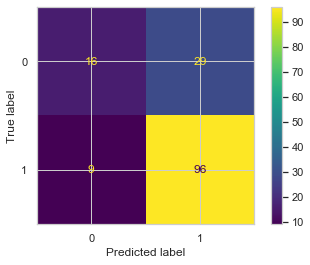

In [43]:
plot_confusion_matrix(v3_logit_test, X_test, y_test)

AUC - Test Set: 81.06%


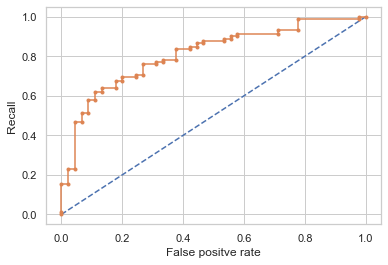

In [44]:
auc = roc_auc_score(y_test, y_final_test_pred_proba)

print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(y_test, y_final_test_pred_proba)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker= '.')
plt.xlabel('False positve rate')
plt.ylabel('Recall')
plt.show()

#### KNN

In [56]:
auc_scores = []
f1_scores = []
accuracy_scores = []
recall_scores = []
precision_scores = []

n_param = []
weight_param = []
p_param = []
met_param = []

for n_neighbors in [3,5,7,9]:
    for weights in ['uniform','distance']:
        for p in [1,2]:
            for metric in ['euclidean', 'manhattan', 'minkowski']:
                knn_manual = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p, metric=metric)
                
                knn_manual.fit(X_train, y_train)
                y_final_test_pred = knn_manual.predict(X_eval)
                y_final_test_pred_proba = knn_manual.predict_proba(X_eval)[:,1]
                auc_scores.append(roc_auc_score(y_eval, y_final_test_pred_proba))
                f1_scores.append(f1_score(y_eval, y_final_test_pred))
                accuracy_scores.append(accuracy_score(y_eval, y_final_test_pred))
                recall_scores.append(recall_score(y_eval, y_final_test_pred))
                precision_scores.append(precision_score(y_eval, y_final_test_pred))
                n_param.append(n_neighbors)
                weight_param.append(weights)
                p_param.append(p)
                met_param.append(metric)

In [57]:
from IPython.display import HTML


compare_v3_knn = pd.DataFrame()

compare_v3_knn.style.set_caption("SVM - Validation Set")
#compare_v3_svc['Modell Name'] = "SVM"
compare_v3_knn['Precision'] = precision_scores
compare_v3_knn['Recall'] = recall_scores
compare_v3_knn['F1'] = f1_scores
compare_v3_knn['AUC'] = auc_scores
compare_v3_knn['Accuracy'] = accuracy_scores
compare_v3_knn['N_neighbors'] = n_param
compare_v3_knn['Weights'] = weight_param
compare_v3_knn['Metrics'] = met_param
compare_v3_knn['P'] = p_param


compare_v3_knn

,Precision,Recall,F1,AUC,Accuracy,N_neighbors,Weights,Metrics,P
0,0.776860,0.895238,0.831858,0.760423,0.746667,3,uniform,euclidean,1
1,0.769841,0.923810,0.839827,0.707937,0.753333,3,uniform,manhattan,1
2,0.769841,0.923810,0.839827,0.707937,0.753333,3,uniform,minkowski,1
3,0.776860,0.895238,0.831858,0.760423,0.746667,3,uniform,euclidean,2
4,0.769841,0.923810,0.839827,0.707937,0.753333,3,uniform,manhattan,2
5,0.776860,0.895238,0.831858,0.760423,0.746667,3,uniform,minkowski,2
6,0.776860,0.895238,0.831858,0.757778,0.746667,3,distance,euclidean,1
7,0.769841,0.923810,0.839827,0.708148,0.753333,3,distance,manhattan,1
8,0.769841,0.923810,0.839827,0.708148,0.753333,3,distance,minkowski,1
9,0.776860,0.895238,0.831858,0.757778,0.746667,3,distance,euclidean,2


In [58]:
compare_v3_knn.loc[compare_v3_knn['AUC'] == compare_v3_knn['AUC'].max()]

,Precision,Recall,F1,AUC,Accuracy,N_neighbors,Weights,Metrics,P
31,0.76,0.904762,0.826087,0.76254,0.733333,7,distance,manhattan,1
32,0.76,0.904762,0.826087,0.76254,0.733333,7,distance,minkowski,1
34,0.76,0.904762,0.826087,0.76254,0.733333,7,distance,manhattan,2


In [139]:
knn_auc = compare_v3_knn.loc[compare_v3_knn['AUC'] == compare_v3_knn['AUC'].max()]['AUC'][:1][31]
knn_pre = compare_v3_knn.loc[compare_v3_knn['Precision'] == compare_v3_knn['Precision'].max()]['Precision'][:1][36]
knn_rec = compare_v3_knn.loc[compare_v3_knn['Recall'] == compare_v3_knn['Recall'].max()]['Recall'][:1][36]
knn_f1 = compare_v3_knn.loc[compare_v3_knn['F1'] == compare_v3_knn['F1'].max()]['F1'][:1][36]
knn_acc = compare_v3_knn.loc[compare_v3_knn['Accuracy'] == compare_v3_knn['Accuracy'].max()]['Accuracy'][:1][36]

In [140]:
knn_acc

0.8066666666666666

In [62]:
v3_knn_test = KNeighborsClassifier(n_neighbors=7,weights='distance', metric='manhattan', p=1)

In [63]:
v3_knn_test.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                     weights='distance')

In [64]:
y_final_test_pred = v3_knn_test.predict(X_test)
y_final_test_pred_proba = v3_knn_test.predict_proba(X_test)[:, 1]

In [69]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.58      0.24      0.34        45
           1       0.74      0.92      0.82       105

    accuracy                           0.72       150
   macro avg       0.66      0.58      0.58       150
weighted avg       0.69      0.72      0.68       150



In [70]:
roc_auc_score(y_test, y_final_test_pred_proba)

0.7786243386243387

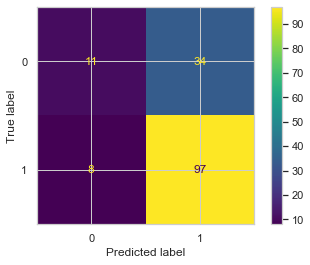

In [71]:
plot_confusion_matrix(v3_knn_test, X_test, y_test)

AUC - Test Set: 77.86%


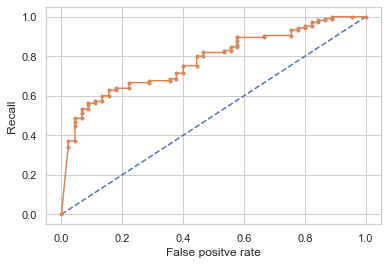

In [72]:
auc = roc_auc_score(y_test, y_final_test_pred_proba)

print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(y_test, y_final_test_pred_proba)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker= '.')
plt.xlabel('False positve rate')
plt.ylabel('Recall')
plt.show()

#### SVM

In [76]:

auc_scores = []
f1_scores = []
accuracy_scores = []
recall_scores = []
precision_scores = []

gamma_param = []
c_param = []
kernel_param = []

for gamma in [1,0.1,0.001,0.0001]:
    for C in [1,10,100,1000]:
        for kernel in ['linear','rbf']:
            svm_manual = SVC(gamma=gamma, C=C, kernel=kernel, probability=True)
            #svm_manual.fit(X_train, y_train)
            svm_manual.fit(X_train, y_train)
            y_final_test_pred = svm_manual.predict(X_eval)
            y_final_test_pred_proba = svm_manual.predict_proba(X_eval)[:,1]
            auc_scores.append(roc_auc_score(y_eval, y_final_test_pred_proba))
            f1_scores.append(f1_score(y_eval, y_final_test_pred))
            accuracy_scores.append(accuracy_score(y_eval, y_final_test_pred))
            recall_scores.append(recall_score(y_eval, y_final_test_pred))
            precision_scores.append(precision_score(y_eval, y_final_test_pred))
            gamma_param.append(gamma)
            c_param.append(C)
            kernel_param.append(kernel)

In [77]:
from IPython.display import HTML


compare_v3_svc = pd.DataFrame()

compare_v3_svc.style.set_caption("SVM - Validation Set")
#compare_v3_svc['Modell Name'] = "SVM"
compare_v3_svc['Precision'] = precision_scores
compare_v3_svc['Recall'] = recall_scores
compare_v3_svc['F1'] = f1_scores
compare_v3_svc['AUC'] = auc_scores
compare_v3_svc['Accuracy'] = accuracy_scores
compare_v3_svc['C'] = c_param
compare_v3_svc['Gamma'] = gamma_param
compare_v3_svc['Kernel'] = kernel_param


compare_v3_svc

,Precision,Recall,F1,AUC,Accuracy,C,Gamma,Kernel
0,0.809917,0.933333,0.867257,0.786032,0.800000,1,1.0000,linear
1,0.700000,1.000000,0.823529,0.695026,0.700000,1,1.0000,rbf
2,0.809917,0.933333,0.867257,0.787302,0.800000,10,1.0000,linear
3,0.700000,1.000000,0.823529,0.699894,0.700000,10,1.0000,rbf
4,0.809917,0.933333,0.867257,0.788571,0.800000,100,1.0000,linear
5,0.700000,1.000000,0.823529,0.699894,0.700000,100,1.0000,rbf
6,0.809917,0.933333,0.867257,0.788571,0.800000,1000,1.0000,linear
7,0.700000,1.000000,0.823529,0.699894,0.700000,1000,1.0000,rbf
8,0.809917,0.933333,0.867257,0.786032,0.800000,1,0.1000,linear
9,0.764706,0.990476,0.863071,0.747937,0.780000,1,0.1000,rbf


In [78]:
compare_v3_svc.loc[compare_v3_svc['AUC'] == compare_v3_svc['AUC'].max()]

,Precision,Recall,F1,AUC,Accuracy,C,Gamma,Kernel
25,0.7,1.0,0.823529,0.811217,0.7,1,0.0001,rbf
27,0.7,1.0,0.823529,0.811217,0.7,10,0.0001,rbf


In [129]:
svc_auc = compare_v3_svc.loc[compare_v3_svc['AUC'] == compare_v3_svc['AUC'].max()]['AUC'][:1][25]
svc_pre = compare_v3_svc.loc[compare_v3_svc['Precision'] == compare_v3_svc['Precision'].max()]['Precision'][:1][0]
svc_rec = compare_v3_svc.loc[compare_v3_svc['Recall'] == compare_v3_svc['Recall'].max()]['Recall'][:1][1]
svc_f1 = compare_v3_svc.loc[compare_v3_svc['F1'] == compare_v3_svc['F1'].max()]['F1'][:1][0]
svc_acc = compare_v3_svc.loc[compare_v3_svc['Accuracy'] == compare_v3_svc['Accuracy'].max()]['Accuracy'][:1][0]

In [130]:
svc_acc

0.8

In [80]:
v3_svc_test = SVC(C=10, gamma=0.0001, kernel='rbf',probability=True)

In [81]:
v3_svc_test.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [82]:
y_final_test_pred = v3_svc_test.predict(X_test)
y_final_test_pred_proba = v3_svc_test.predict_proba(X_test)[:, 1]

In [83]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.70      1.00      0.82       105

    accuracy                           0.70       150
   macro avg       0.35      0.50      0.41       150
weighted avg       0.49      0.70      0.58       150



E:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
roc_auc_score(y_test, y_final_test_pred_proba)

0.8249735449735448

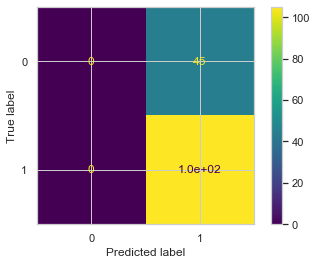

In [85]:
plot_confusion_matrix(v3_svc_test, X_test, y_test)

AUC - Test Set: 82.50%


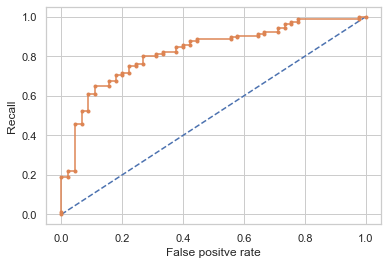

In [86]:
auc = roc_auc_score(y_test, y_final_test_pred_proba)

print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(y_test, y_final_test_pred_proba)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker= '.')
plt.xlabel('False positve rate')
plt.ylabel('Recall')
plt.show()

#### Compare eval

In [149]:
comp_eval_auc_df = pd.DataFrame({'Modell Name' : ['Logistic_Regression', 'KNN','SVM'],
                            'Precision': [logit_pre, knn_pre, svc_pre],
                            'Recall': [logit_rec, knn_rec, svc_rec],
                            'F1': [logit_f1, knn_f1, svc_f1],
                            'AUC':[logit_auc, knn_auc, svc_auc],
                            'Accuracy': [logit_acc, knn_acc, svc_acc]})


comp_eval_auc_df

,Modell Name,Precision,Recall,F1,AUC,Accuracy
0,Logistic_Regression,0.829060,0.923810,0.873874,0.788360,0.813333
1,KNN,0.801587,0.961905,0.874459,0.762540,0.806667
2,SVM,0.809917,1.000000,0.867257,0.811217,0.800000


In [ ]:
asd

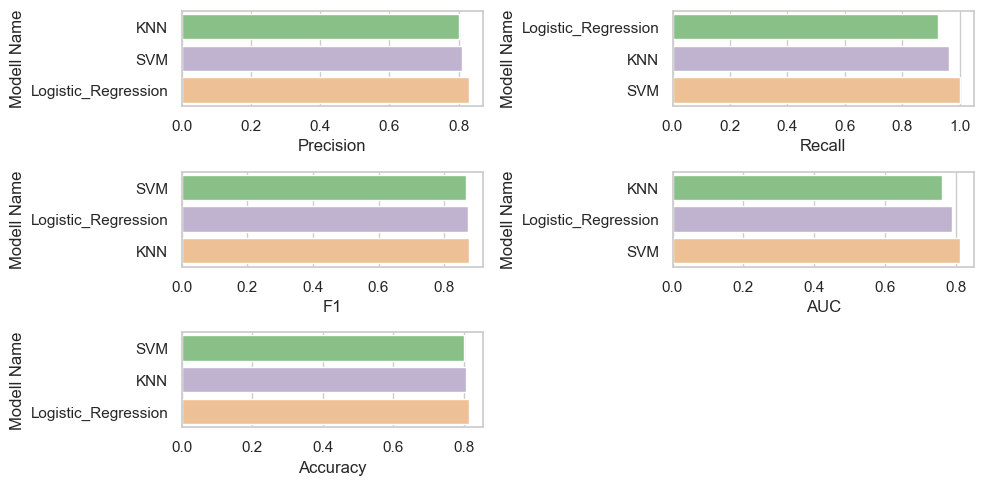

In [148]:
auc_sort = comp_eval_auc_df.sort_values(by=['AUC'])
f1_sort = comp_eval_auc_df.sort_values(by=['F1'])
rec_sort = comp_eval_auc_df.sort_values(by=['Recall'])
pre_sort = comp_eval_auc_df.sort_values(by=['Precision'])
acc_sort = comp_eval_auc_df.sort_values(by=['Accuracy'])

fig, ax = plt.subplots(nrows=3, ncols=2, dpi=100, figsize=(10,5))
sns.set(style="whitegrid")

sns.barplot(y='Modell Name', x="Precision", data=pre_sort, palette="Accent", ax=ax[0][0])
sns.barplot(y='Modell Name', x="Recall", data=rec_sort, palette="Accent", ax=ax[0][1])
sns.barplot(y='Modell Name', x="F1", data=f1_sort, palette="Accent", ax=ax[1][0])
sns.barplot(y='Modell Name', x="AUC", data=auc_sort, palette="Accent", ax=ax[1][1])
sns.barplot(y='Modell Name', x="Accuracy", data=acc_sort, palette="Accent", ax=ax[2][0])
fig.delaxes(ax[2][1])
plt.tight_layout()
plt.show()

In [151]:
comp_test_auc_df = pd.DataFrame({'Modell Name' : ['Logistic_Regression', 'KNN','SVM'],
                            'Precision': [0.77,0.74, 0.70],
                            'Recall': [0.91, 0.92, 1.00],
                            'F1': [0.83, 0.82, 0.82],
                            'AUC':[0.81, 0.778, 0.824],
                            'Accuracy': [0.75, 0.72, 0.70]})


comp_test_auc_df

,Modell Name,Precision,Recall,F1,AUC,Accuracy
0,Logistic_Regression,0.77,0.91,0.83,0.810,0.75
1,KNN,0.74,0.92,0.82,0.778,0.72
2,SVM,0.70,1.00,0.82,0.824,0.70


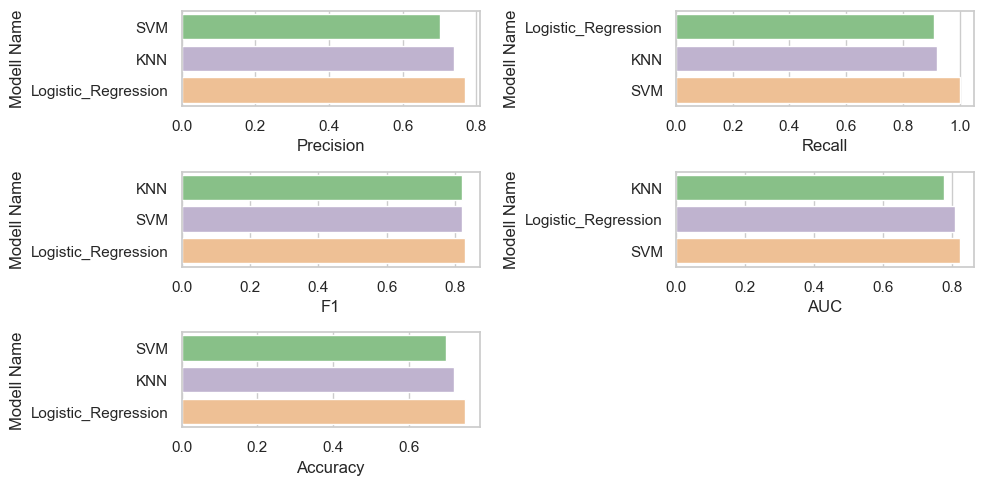

In [152]:
auc_sort = comp_test_auc_df.sort_values(by=['AUC'])
f1_sort = comp_test_auc_df.sort_values(by=['F1'])
rec_sort = comp_test_auc_df.sort_values(by=['Recall'])
pre_sort = comp_test_auc_df.sort_values(by=['Precision'])
acc_sort = comp_test_auc_df.sort_values(by=['Accuracy'])

fig, ax = plt.subplots(nrows=3, ncols=2, dpi=100, figsize=(10,5))
sns.set(style="whitegrid")

sns.barplot(y='Modell Name', x="Precision", data=pre_sort, palette="Accent", ax=ax[0][0])
sns.barplot(y='Modell Name', x="Recall", data=rec_sort, palette="Accent", ax=ax[0][1])
sns.barplot(y='Modell Name', x="F1", data=f1_sort, palette="Accent", ax=ax[1][0])
sns.barplot(y='Modell Name', x="AUC", data=auc_sort, palette="Accent", ax=ax[1][1])
sns.barplot(y='Modell Name', x="Accuracy", data=acc_sort, palette="Accent", ax=ax[2][0])
fig.delaxes(ax[2][1])
plt.tight_layout()
plt.show()

### Version 4 Cross Validation without fine tuning

In [169]:
# K-Fold cross validation on training set test
# scoring

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report, recall_score, precision_score, plot_roc_curve, roc_curve
from sklearn.metrics import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [170]:
df_raw = pd.read_csv('kredit.csv')
df = df_raw.copy(deep=True)

X = df.drop('kredit', axis=1)
y = df['kredit']

categorical_columns = ['laufkont', 'moral', 'verw', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb']

numerical_columns = ['laufzeit', 'hoehe', 'alter']

X_cat = df[categorical_columns]
X_num = df[numerical_columns].values

In [171]:
X = np.hstack((X_cat, X_num))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

from sklearn.preprocessing import OneHotEncoder, StandardScaler

scaler = StandardScaler()
X_train[:, -4:] = scaler.fit_transform(X_train[:, -4:])
X_test[:, -4:] = scaler.transform(X_test[:, -4:])

#### Logit

In [156]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score, StratifiedKFold

In [157]:
from sklearn.linear_model import LogisticRegression

logit_cv = LogisticRegression(max_iter=1000)

kFoldCV = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

scores_log = cross_validate(logit_cv, X_train, y_train, 
                        scoring=['precision','recall','f1','roc_auc','accuracy'],
                        cv= kFoldCV, n_jobs=-1)

In [158]:
scores_log = pd.DataFrame(scores_log)
scores_log

,fit_time,score_time,test_precision,test_recall,test_f1,test_roc_auc,test_accuracy
0,0.013963,0.003990,0.762712,0.918367,0.833333,0.808552,0.742857
1,0.019948,0.004987,0.882353,0.918367,0.900000,0.919339,0.857143
2,0.015958,0.002992,0.830189,0.897959,0.862745,0.747328,0.800000
3,0.013963,0.003990,0.745763,0.897959,0.814815,0.783285,0.714286
4,0.020945,0.003989,0.803571,0.918367,0.857143,0.748299,0.785714
5,0.015958,0.003989,0.767857,0.877551,0.819048,0.719145,0.728571
6,0.014961,0.003990,0.764706,0.795918,0.780000,0.663751,0.685714
7,0.014961,0.003991,0.781818,0.877551,0.826923,0.793975,0.742857
8,0.011967,0.002992,0.830189,0.897959,0.862745,0.852284,0.800000
9,0.012965,0.001994,0.716667,0.877551,0.788991,0.632653,0.671429


In [159]:
scores_log.mean()

fit_time          0.015559
score_time        0.003690
test_precision    0.788582
test_recall       0.887755
test_f1           0.834574
test_roc_auc      0.766861
test_accuracy     0.752857
dtype: float64

In [163]:
scores_log.mean()*100

fit_time           1.555898
score_time         0.369027
test_precision    78.858242
test_recall       88.775510
test_f1           83.457427
test_roc_auc      76.686103
test_accuracy     75.285714
dtype: float64

In [168]:
print("Std dev precision : {:.2f} ".format(scores_log['test_precision'].std()))
print("Std dev recall : {:.2f} ".format(scores_log['test_recall'].std()))
print("Std dev f1 : {:.2f} ".format(scores_log['test_f1'].std()))
print("Std dev auc : {:.2f} ".format(scores_log['test_roc_auc'].std()))
print("Std dev accuracy : {:.2f} ".format(scores_log['test_accuracy'].std()))

Std dev precision : 0.05 
Std dev recall : 0.04 
Std dev f1 : 0.04 
Std dev auc : 0.08 
Std dev accuracy : 0.06 


In [167]:
scores_log['test_accuracy'].std()*100

5.75580156891117

In [ ]:
####################################################

auc_sort = compare_v2.sort_values(by=['AUC'])
f1_sort = compare_v2.sort_values(by=['F1'])
rec_sort = compare_v2.sort_values(by=['Recall'])
pre_sort = compare_v2.sort_values(by=['Precision'])
acc_sort = compare_v2.sort_values(by=['Accuracy'])

fig, ax = plt.subplots(nrows=3, ncols=2, dpi=100, figsize=(10,5))
sns.set(style="whitegrid")

sns.barplot(y='Modell Name', x="Precision", data=pre_sort, palette="Accent", ax=ax[0][0])
sns.barplot(y='Modell Name', x="Recall", data=rec_sort, palette="Accent", ax=ax[0][1])
sns.barplot(y='Modell Name', x="F1", data=f1_sort, palette="Accent", ax=ax[1][0])
sns.barplot(y='Modell Name', x="AUC", data=auc_sort, palette="Accent", ax=ax[1][1])
sns.barplot(y='Modell Name', x="Accuracy", data=acc_sort, palette="Accent", ax=ax[2][0])
fig.delaxes(ax[2][1])
plt.tight_layout()
plt.show()

#####################################################

#### KNN

In [305]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score, StratifiedKFold

In [306]:
from sklearn.neighbors import KNeighborsClassifier

knn_cv = KNeighborsClassifier()

kFoldCV = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

scores_knn = cross_validate(knn_cv, X_train, y_train, 
                        scoring=['precision','recall','f1','roc_auc','accuracy'],
                        cv= kFoldCV, n_jobs=-1)

In [307]:
scores_knn = pd.DataFrame(scores_knn)
scores_knn

,fit_time,score_time,test_precision,test_recall,test_f1,test_roc_auc,test_accuracy
0,0.012963,0.007981,0.816667,1.000000,0.899083,0.788630,0.842857
1,0.012963,0.006982,0.830189,0.897959,0.862745,0.808552,0.800000
2,0.011966,0.007981,0.754098,0.938776,0.836364,0.660350,0.742857
3,0.012963,0.006982,0.741379,0.877551,0.803738,0.641399,0.700000
4,0.012963,0.006982,0.754386,0.877551,0.811321,0.679786,0.714286
5,0.012963,0.006982,0.766667,0.938776,0.844037,0.729835,0.757143
6,0.012963,0.006982,0.727273,0.816327,0.769231,0.689990,0.657143
7,0.012963,0.006982,0.758065,0.959184,0.846847,0.755102,0.757143
8,0.001993,0.005984,0.816327,0.816327,0.816327,0.785714,0.742857
9,0.001995,0.006013,0.724138,0.857143,0.785047,0.602041,0.671429


In [308]:
scores_knn.mean()

fit_time          0.010669
score_time        0.006985
test_precision    0.768919
test_recall       0.897959
test_f1           0.827474
test_roc_auc      0.714140
test_accuracy     0.738571
dtype: float64

In [309]:
print("Std dev precision : {:.2f} %".format(scores_knn['test_precision'].std()))
print("Std dev recall : {:.2f} %".format(scores_knn['test_recall'].std()))
print("Std dev f1 : {:.2f} %".format(scores_knn['test_f1'].std()))
print("Std dev auc : {:.2f} %".format(scores_knn['test_roc_auc'].std()))
print("Std dev accuracy : {:.2f} %".format(scores_knn['test_accuracy'].std()))

Std dev precision : 0.04 %
Std dev recall : 0.06 %
Std dev f1 : 0.04 %
Std dev auc : 0.07 %
Std dev accuracy : 0.06 %


#### SVM

In [172]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score, StratifiedKFold

In [173]:
from sklearn.svm import SVC

svm_cv = SVC(kernel='linear',probability= True)

kFoldCV = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

scores_svm = cross_validate(svm_cv, X_train, y_train, 
                        scoring=['precision','recall','f1','roc_auc','accuracy'],
                        cv= kFoldCV, n_jobs=-1)


In [174]:
scores_svm = pd.DataFrame(scores_svm)
scores_svm

,fit_time,score_time,test_precision,test_recall,test_f1,test_roc_auc,test_accuracy
0,0.077456,0.019973,0.775862,0.918367,0.841121,0.803693,0.757143
1,0.069421,0.004510,0.851852,0.938776,0.893204,0.914480,0.842857
2,0.076944,0.003990,0.785714,0.897959,0.838095,0.725948,0.757143
3,0.063984,0.023962,0.750000,0.918367,0.825688,0.779397,0.728571
4,0.068962,0.003989,0.807018,0.938776,0.867925,0.746356,0.800000
5,0.071960,0.004009,0.771930,0.897959,0.830189,0.710398,0.742857
6,0.070957,0.003989,0.722222,0.795918,0.757282,0.653061,0.642857
7,0.071969,0.003502,0.789474,0.918367,0.849057,0.798834,0.771429
8,0.076359,0.002989,0.789474,0.918367,0.849057,0.867833,0.771429
9,0.064402,0.004231,0.700000,0.857143,0.770642,0.602527,0.642857


In [175]:
scores_svm.mean()

fit_time          0.071242
score_time        0.007514
test_precision    0.774355
test_recall       0.900000
test_f1           0.832226
test_roc_auc      0.760253
test_accuracy     0.745714
dtype: float64

In [177]:
print("Std dev precision : {:.2f} ".format(scores_svm['test_precision'].std()))
print("Std dev recall : {:.2f} ".format(scores_svm['test_recall'].std()))
print("Std dev f1 : {:.2f} ".format(scores_svm['test_f1'].std()))
print("Std dev auc : {:.2f} ".format(scores_svm['test_roc_auc'].std()))
print("Std dev accuracy : {:.2f} ".format(scores_svm['test_accuracy'].std()))

Std dev precision : 0.04 
Std dev recall : 0.04 
Std dev f1 : 0.04 
Std dev auc : 0.09 
Std dev accuracy : 0.06 


### Version 5 GridSearch liat atas

In [459]:
# GridSearchCV lihat atas aja biar dapet kolomnya
# 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report, recall_score, precision_score, plot_roc_curve, roc_curve
from sklearn.metrics import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

In [460]:
df_raw = pd.read_csv('kredit.csv')
df = df_raw.copy(deep=True)

X = df.drop('kredit', axis=1)
y = df['kredit']

categorical_columns = ['laufkont', 'moral', 'verw', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb']

numerical_columns = ['laufzeit', 'hoehe', 'alter']

X_cat = df[categorical_columns]
X_num = df[numerical_columns].values

In [461]:
X = np.hstack((X_cat, X_num))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[:, -4:] = scaler.fit_transform(X_train[:, -4:])
X_test[:, -4:] = scaler.transform(X_test[:, -4:])

#### Logit

In [462]:
param_test_logit = {'C':[1,2,3,4,5],
             'solver':['newton-cg', 'lbfgs', 'sag', 'saga','liblinear'],
             'penalty':['l1','l2']
             }

In [467]:
from sklearn.linear_model import LogisticRegression

logit_grid = LogisticRegression(max_iter=1000)
scorer = ['precision','recall','f1','roc_auc','accuracy']
df_list = ['logit_df_cv_pre','logit_df_cv_rec','logit_df_cv_f1','logit_df_cv_auc','logit_df_cv_acc']

auc_scores = []
f1_scores = []
accuracy_scores = []
recall_scores = []
precision_scores = []
mean_scores = []
std_scores = []
param_ = []

for score in scorer:
    for df_li in df_list:
        grid_model_logit = GridSearchCV(estimator = logit_grid,
                                       param_grid = param_test_logit,
                                       cv = 10,
                                       scoring = '%s' % score,
                                       n_jobs= -1)

        grid_model_logit.fit(X_train, y_train)
        print("Best param found based on %s score : " % score)
        print()
        print(grid_model_logit.best_params_)
        print()
        print("Best score based on %s score : " %score)
        print(grid_model_logit.best_score_)

        df_li = pd.DataFrame(grid_model_logit.cv_results_)


        #auc_scores.append(roc_auc_score(y_eval, y_final_test_pred_proba))
        #f1_scores.append(f1_score(y_eval, y_final_test_pred))
        #accuracy_scores.append(accuracy_score(y_eval, y_final_test_pred))
        #recall_scores.append(recall_score(y_eval, y_final_test_pred))
        #precision_scores.append(precision_score(y_eval, y_final_test_pred))
        #mean_scores.append(grid_model_logit.cv_results_['mean_test_score'])
        #std_scores.append(grid_model_logit.cv_results_['std_test_score'])

        means = grid_model_logit.cv_results_['mean_test_score']
        stds = grid_model_logit.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, grid_model_logit.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, grid_model_logit.predict(X_test)
        print(classification_report(y_true, y_pred))
        print()

Best param found based on precision score : 

{'C': 5, 'penalty': 'l2', 'solver': 'liblinear'}

Best score based on precision score : 
0.7872387311370362
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'sag'}
0.782 (+/-0.050) for {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
0.779 (+/-0.057) for {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.785 (+/-0.054) for {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.785 (+/-0.054) for {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.785 (+/-0.054) for {'C': 1, 'penalty': 'l2', 'solver': 'sag'}
0.785 (+/-0.054) for {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
0.776 (+/-0.047) for {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'sag'}


Best param found based on precision score : 

{'C': 5, 'penalty': 'l2', 'solver': 'liblinear'}

Best score based on precision score : 
0.7872387311370362
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'sag'}
0.782 (+/-0.050) for {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
0.779 (+/-0.057) for {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.785 (+/-0.054) for {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.785 (+/-0.054) for {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.785 (+/-0.054) for {'C': 1, 'penalty': 'l2', 'solver': 'sag'}
0.785 (+/-0.054) for {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
0.776 (+/-0.047) for {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'sag'}


Best param found based on recall score : 

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Best score based on recall score : 
0.9
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'sag'}
0.894 (+/-0.075) for {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
0.898 (+/-0.082) for {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.892 (+/-0.075) for {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.892 (+/-0.075) for {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.892 (+/-0.075) for {'C': 1, 'penalty': 'l2', 'solver': 'sag'}
0.892 (+/-0.075) for {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
0.900 (+/-0.083) for {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'sag'}
0.892 (+/-0.075) for 

Best param found based on recall score : 

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Best score based on recall score : 
0.9
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'sag'}
0.894 (+/-0.075) for {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
0.898 (+/-0.082) for {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.892 (+/-0.075) for {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.892 (+/-0.075) for {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.892 (+/-0.075) for {'C': 1, 'penalty': 'l2', 'solver': 'sag'}
0.892 (+/-0.075) for {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
0.900 (+/-0.083) for {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'sag'}
0.892 (+/-0.075) for 

Best param found based on f1 score : 

{'C': 5, 'penalty': 'l2', 'solver': 'liblinear'}

Best score based on f1 score : 
0.838788798400449
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'sag'}
0.834 (+/-0.058) for {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
0.834 (+/-0.061) for {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.835 (+/-0.060) for {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.835 (+/-0.060) for {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.835 (+/-0.060) for {'C': 1, 'penalty': 'l2', 'solver': 'sag'}
0.835 (+/-0.060) for {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
0.833 (+/-0.057) for {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'sag'}
0.834 (+/-0.059

Best param found based on roc_auc score : 

{'C': 4, 'penalty': 'l1', 'solver': 'liblinear'}

Best score based on roc_auc score : 
0.7794946550048591
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'sag'}
0.778 (+/-0.123) for {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
0.776 (+/-0.116) for {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.778 (+/-0.123) for {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.778 (+/-0.123) for {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.778 (+/-0.123) for {'C': 1, 'penalty': 'l2', 'solver': 'sag'}
0.778 (+/-0.122) for {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
0.776 (+/-0.115) for {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'sag'}
0.77

Best param found based on roc_auc score : 

{'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}

Best score based on roc_auc score : 
0.7793002915451896
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'sag'}
0.778 (+/-0.123) for {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
0.776 (+/-0.116) for {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.778 (+/-0.123) for {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.778 (+/-0.123) for {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.778 (+/-0.123) for {'C': 1, 'penalty': 'l2', 'solver': 'sag'}
0.778 (+/-0.122) for {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
0.776 (+/-0.115) for {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'sag'}
0.77

Best param found based on accuracy score : 

{'C': 5, 'penalty': 'l2', 'solver': 'liblinear'}

Best score based on accuracy score : 
0.7585714285714286
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'sag'}
0.751 (+/-0.083) for {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
0.750 (+/-0.088) for {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.753 (+/-0.087) for {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.753 (+/-0.087) for {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.753 (+/-0.087) for {'C': 1, 'penalty': 'l2', 'solver': 'sag'}
0.753 (+/-0.087) for {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
0.749 (+/-0.080) for {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'sag'}
0.

Best param found based on accuracy score : 

{'C': 5, 'penalty': 'l2', 'solver': 'liblinear'}

Best score based on accuracy score : 
0.7585714285714286
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'sag'}
0.751 (+/-0.083) for {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
0.750 (+/-0.088) for {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.753 (+/-0.087) for {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.753 (+/-0.087) for {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.753 (+/-0.087) for {'C': 1, 'penalty': 'l2', 'solver': 'sag'}
0.753 (+/-0.087) for {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
0.749 (+/-0.080) for {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1', 'solver': 'sag'}
0.

In [ ]:
from sklearn.linear_model import LogisticRegression

['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_penalty', 'param_solver', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score']

### Version 6 Modeling with feature selection

#### Feature Selection

In [396]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, cross_validate, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [397]:
######
df_raw = pd.read_csv('kredit.csv')
df = df_raw.copy(deep=True)

X = df.drop('kredit', axis=1)
y = df['kredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)
categorical_columns = ['laufkont', 'moral', 'verw', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb']

numerical_columns = [col for col in df.columns[1:] if col not in categorical_columns]



X_train_cat = X_train[categorical_columns]
X_train_num = X_train[numerical_columns]


In [398]:
# define an empty dictionary to store chi-squared test results
chi2_check = {}

# loop over each column in the training set to calculate chi-statistic with the target variable
for column in X_train_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, X_train_cat[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('P-Wert',[]).append(round(p, 10))

# convert the dictionary to a DF
chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['P-Wert'], ascending = True, ignore_index = True, inplace = True)
chi2_result

,Feature,P-Wert
0,laufkont,0.000000e+00
1,moral,8.930000e-08
2,sparkont,7.808000e-07
3,verw,6.418766e-04
4,verm,7.100809e-04
5,wohn,2.433382e-03
6,weitkred,3.997826e-03
7,gastarb,6.407223e-03
8,buerge,4.497301e-02
9,beszeit,6.039272e-02


In [399]:
X_train_num.shape,y_train.shape

((700, 3), (700,))

In [400]:
# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(X_train_num, y_train)
# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Continuous Features': X_train_num.columns.values, 'F-Score': F_statistic, 'P-Wert': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table

,Continuous Features,F-Score,P-Wert
0,laufzeit,29.371354,8.240000e-08
1,hoehe,16.070181,6.760870e-05
2,alter,1.888618,1.697990e-01


In [401]:
# 3 most significant features on categorical variable

drop_columns_list = chi2_result.iloc[4:, 0].to_list()

def col_to_drop(df, columns_list):
    df.drop(columns = columns_list, inplace = True)

# apply to X_train
col_to_drop(X_train, drop_columns_list)

# use all numerical value

col_to_drop(X_test, drop_columns_list)

E:\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [402]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 7), (700,), (300, 7), (300,))

#### Cross Validation

In [376]:
# K-Fold cross validation with feature selection
# scoring

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report, recall_score, precision_score, plot_roc_curve, roc_curve
from sklearn.metrics import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

##### Logit

In [378]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score, StratifiedKFold

from sklearn.linear_model import LogisticRegression

logit_cv = LogisticRegression(max_iter=1000)

kFoldCV = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

scores_log = cross_validate(logit_cv, X_train, y_train, 
                        scoring=['precision','recall','f1','roc_auc','accuracy'],
                        cv= kFoldCV, n_jobs=-1)

In [379]:
scores_log = pd.DataFrame(scores_log)
scores_log

,fit_time,score_time,test_precision,test_recall,test_f1,test_roc_auc,test_accuracy
0,0.112699,0.004986,0.767857,0.877551,0.819048,0.761905,0.728571
1,0.081780,0.005986,0.849057,0.918367,0.882353,0.865889,0.828571
2,0.019947,0.003991,0.793103,0.938776,0.859813,0.722060,0.785714
3,0.047872,0.018950,0.703125,0.918367,0.796460,0.770651,0.671429
4,0.022937,0.003989,0.758621,0.897959,0.822430,0.742468,0.728571
5,0.016955,0.002992,0.783333,0.959184,0.862385,0.709427,0.785714
6,0.035902,0.003990,0.741379,0.877551,0.803738,0.714286,0.700000
7,0.040889,0.003991,0.775862,0.918367,0.841121,0.775510,0.757143
8,0.014960,0.003990,0.766667,0.938776,0.844037,0.824101,0.757143
9,0.035905,0.003990,0.709677,0.897959,0.792793,0.639456,0.671429


In [380]:
scores_log.mean()

fit_time          0.042985
score_time        0.005685
test_precision    0.764868
test_recall       0.914286
test_f1           0.832418
test_roc_auc      0.752575
test_accuracy     0.741429
dtype: float64

In [381]:
print("Std dev precision : {:.2f} %".format(scores_log['test_precision'].std()))
print("Std dev recall : {:.2f} %".format(scores_log['test_recall'].std()))
print("Std dev f1 : {:.2f} %".format(scores_log['test_f1'].std()))
print("Std dev auc : {:.2f} %".format(scores_log['test_roc_auc'].std()))
print("Std dev accuracy : {:.2f} %".format(scores_log['test_accuracy'].std()))

Std dev precision : 0.04 %
Std dev recall : 0.03 %
Std dev f1 : 0.03 %
Std dev auc : 0.06 %
Std dev accuracy : 0.05 %


##### KNN

In [389]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score, StratifiedKFold

In [390]:
from sklearn.neighbors import KNeighborsClassifier

knn_cv = KNeighborsClassifier()

kFoldCV = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

scores_knn = cross_validate(knn_cv, X_train, y_train, 
                        scoring=['precision','recall','f1','roc_auc','accuracy'],
                        cv= kFoldCV, n_jobs=-1)

In [391]:
scores_knn = pd.DataFrame(scores_knn)
scores_knn

,fit_time,score_time,test_precision,test_recall,test_f1,test_roc_auc,test_accuracy
0,0.001995,0.007980,0.754717,0.816327,0.784314,0.578717,0.685714
1,0.001995,0.007978,0.704918,0.877551,0.781818,0.606414,0.657143
2,0.001996,0.009972,0.754386,0.877551,0.811321,0.685617,0.714286
3,0.001995,0.005983,0.711864,0.857143,0.777778,0.512634,0.657143
4,0.002992,0.008976,0.696429,0.795918,0.742857,0.567055,0.614286
5,0.002992,0.006982,0.661017,0.795918,0.722222,0.461127,0.571429
6,0.002993,0.005983,0.660714,0.755102,0.704762,0.463071,0.557143
7,0.002990,0.010971,0.700000,0.857143,0.770642,0.589407,0.642857
8,0.001994,0.006982,0.714286,0.918367,0.803571,0.604470,0.685714
9,0.001995,0.006981,0.655172,0.775510,0.710280,0.518950,0.557143


In [392]:
scores_knn.mean()

fit_time          0.002394
score_time        0.007879
test_precision    0.701350
test_recall       0.832653
test_f1           0.760957
test_roc_auc      0.558746
test_accuracy     0.634286
dtype: float64

In [393]:
print("Std dev precision : {:.2f} %".format(scores_knn['test_precision'].std()))
print("Std dev recall : {:.2f} %".format(scores_knn['test_recall'].std()))
print("Std dev f1 : {:.2f} %".format(scores_knn['test_f1'].std()))
print("Std dev auc : {:.2f} %".format(scores_knn['test_roc_auc'].std()))
print("Std dev accuracy : {:.2f} %".format(scores_knn['test_accuracy'].std()))

Std dev precision : 0.04 %
Std dev recall : 0.05 %
Std dev f1 : 0.04 %
Std dev auc : 0.07 %
Std dev accuracy : 0.06 %


##### SVM

In [403]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score, StratifiedKFold

In [404]:
from sklearn.svm import SVC

svm_cv = SVC(kernel='linear',probability= True)

kFoldCV = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

scores_svm = cross_validate(svm_cv, X_train, y_train, 
                        scoring=['precision','recall','f1','roc_auc','accuracy'],
                        cv= kFoldCV, n_jobs=-1)


In [405]:
scores_svm = pd.DataFrame(scores_svm)
scores_svm

,fit_time,score_time,test_precision,test_recall,test_f1,test_roc_auc,test_accuracy
0,300.453938,0.003990,0.764706,0.795918,0.780000,0.717201,0.685714
1,410.655883,0.003990,0.849057,0.918367,0.882353,0.866861,0.828571
2,414.237729,0.004035,0.763636,0.857143,0.807692,0.707483,0.714286
3,456.134309,0.004987,0.737705,0.918367,0.818182,0.754130,0.714286
4,318.401350,0.003989,0.803922,0.836735,0.820000,0.740525,0.742857
5,307.552140,0.003989,0.784314,0.816327,0.800000,0.755102,0.714286
6,351.381079,0.003989,0.763636,0.857143,0.807692,0.589893,0.714286
7,317.110271,0.002992,0.758621,0.897959,0.822430,0.701652,0.728571
8,360.981074,0.002992,0.833333,0.918367,0.873786,0.821186,0.814286
9,248.872063,0.002992,0.736842,0.857143,0.792453,0.655005,0.685714


In [406]:
scores_svm.mean()

fit_time          348.577984
score_time          0.003795
test_precision      0.779577
test_recall         0.867347
test_f1             0.820459
test_roc_auc        0.730904
test_accuracy       0.734286
dtype: float64

In [407]:
print("Std dev precision : {:.2f} %".format(scores_svm['test_precision'].std()))
print("Std dev recall : {:.2f} %".format(scores_svm['test_recall'].std()))
print("Std dev f1 : {:.2f} %".format(scores_svm['test_f1'].std()))
print("Std dev auc : {:.2f} %".format(scores_svm['test_roc_auc'].std()))
print("Std dev accuracy : {:.2f} %".format(scores_svm['test_accuracy'].std()))

Std dev precision : 0.04 %
Std dev recall : 0.04 %
Std dev f1 : 0.03 %
Std dev auc : 0.08 %
Std dev accuracy : 0.05 %


In [410]:
scores_svm['test_f1'].mean()

0.820458851924063

### Version 7 Nested CV

In [178]:
# Nested CV
# 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report, recall_score, precision_score, plot_roc_curve, roc_curve
from sklearn.metrics import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

In [179]:
df_raw = pd.read_csv('kredit.csv')
df = df_raw.copy(deep=True)

X = df.drop('kredit', axis=1)
y = df['kredit']

categorical_columns = ['laufkont', 'moral', 'verw', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb']

numerical_columns = ['laufzeit', 'hoehe', 'alter']

X_cat = df[categorical_columns]
X_num = df[numerical_columns].values

In [180]:
X = np.hstack((X_cat, X_num))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

from sklearn.preprocessing import OneHotEncoder, StandardScaler

scaler = StandardScaler()
X_train[:, -4:] = scaler.fit_transform(X_train[:, -4:])
X_test[:, -4:] = scaler.transform(X_test[:, -4:])

#### Logit

In [496]:
param_test_logit = {'C':[1,2,3,4,5],
             'solver':['newton-cg', 'lbfgs', 'sag', 'saga','liblinear'],
             'penalty':['l1','l2']
             }

innercv = StratifiedKFold(n_splits=2,shuffle=True,random_state=1)
outercv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

ncv_logit = LogisticRegression(max_iter=1000)

ncv_logit_grid = GridSearchCV(estimator= ncv_logit, param_grid = param_test_logit, scoring='accuracy', n_jobs=-1, cv=innercv)
ncv_logit_score_acc = cross_validate(ncv_logit_grid, X_train, y_train, 
                                     scoring=['precision','recall','f1','roc_auc','accuracy'], cv= outercv)

print("Nested CV, based on accuracy in Grid Search part")
print()
ncv_logit_score_acc = pd.DataFrame(ncv_logit_score_acc)
print()
print(ncv_logit_score_acc.mean())
print()
print()
print("Std dev precision : {:.2f} %".format(ncv_logit_score_acc['test_precision'].std()))
print("Std dev recall : {:.2f} %".format(ncv_logit_score_acc['test_recall'].std()))
print("Std dev f1 : {:.2f} %".format(ncv_logit_score_acc['test_f1'].std()))
print("Std dev auc : {:.2f} %".format(ncv_logit_score_acc['test_roc_auc'].std()))
print("Std dev accuracy : {:.2f} %".format(ncv_logit_score_acc['test_accuracy'].std()))

Nested CV, based on accuracy in Grid Search part


fit_time          0.453747
score_time        0.003021
test_precision    0.774762
test_recall       0.897959
test_f1           0.831694
test_roc_auc      0.769339
test_accuracy     0.745714
dtype: float64


Std dev precision : 0.02 %
Std dev recall : 0.03 %
Std dev f1 : 0.03 %
Std dev auc : 0.04 %
Std dev accuracy : 0.04 %


In [497]:
param_test_logit = {'C':[1,2,3,4,5],
             'solver':['newton-cg', 'lbfgs', 'sag', 'saga','liblinear'],
             'penalty':['l1','l2']
             }

innercv = StratifiedKFold(n_splits=2,shuffle=True,random_state=1)
outercv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

ncv_logit = LogisticRegression(max_iter=1000)

ncv_logit_grid = GridSearchCV(estimator= ncv_logit, param_grid = param_test_logit, scoring='f1', n_jobs=-1, cv=innercv)
ncv_logit_score_f1 = cross_validate(ncv_logit_grid, X_train, y_train, 
                                     scoring=['precision','recall','f1','roc_auc','accuracy'], cv= outercv)

print("Nested CV, based on F1 in Grid Search part")
print()
ncv_logit_score_f1 = pd.DataFrame(ncv_logit_score_f1)
print()
print(ncv_logit_score_f1.mean())
print()
print()
print("Std dev precision : {:.2f} %".format(ncv_logit_score_f1['test_precision'].std()))
print("Std dev recall : {:.2f} %".format(ncv_logit_score_f1['test_recall'].std()))
print("Std dev f1 : {:.2f} %".format(ncv_logit_score_f1['test_f1'].std()))
print("Std dev auc : {:.2f} %".format(ncv_logit_score_f1['test_roc_auc'].std()))
print("Std dev accuracy : {:.2f} %".format(ncv_logit_score_f1['test_accuracy'].std()))

Nested CV, based on F1 in Grid Search part


fit_time          0.273347
score_time        0.003002
test_precision    0.773359
test_recall       0.897959
test_f1           0.830879
test_roc_auc      0.768950
test_accuracy     0.744286
dtype: float64


Std dev precision : 0.02 %
Std dev recall : 0.03 %
Std dev f1 : 0.02 %
Std dev auc : 0.04 %
Std dev accuracy : 0.04 %


In [492]:
param_test_logit = {'C':[1,2,3,4,5],
             'solver':['newton-cg', 'lbfgs', 'sag', 'saga','liblinear'],
             'penalty':['l1','l2']
             }

innercv = StratifiedKFold(n_splits=2,shuffle=True,random_state=1)
outercv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

ncv_logit = LogisticRegression(max_iter=1000)

ncv_logit_grid = GridSearchCV(estimator= ncv_logit, param_grid = param_test_logit, scoring='roc_auc', n_jobs=-1, cv=innercv)
ncv_logit_score_auc = cross_validate(ncv_logit_grid, X_train, y_train, 
                                     scoring=['precision','recall','f1','roc_auc','accuracy'], cv= outercv)

print("Nested CV, based on roc auc in Grid Search part")
print()
ncv_logit_score_auc = pd.DataFrame(ncv_logit_score_auc)
print()
print(ncv_logit_score_auc.mean())
print()
print()
print("Std dev precision : {:.2f} %".format(ncv_logit_score_auc['test_precision'].std()))
print("Std dev recall : {:.2f} %".format(ncv_logit_score_auc['test_recall'].std()))
print("Std dev f1 : {:.2f} %".format(ncv_logit_score_auc['test_f1'].std()))
print("Std dev auc : {:.2f} %".format(ncv_logit_score_auc['test_roc_auc'].std()))
print("Std dev accuracy : {:.2f} %".format(ncv_logit_score_auc['test_accuracy'].std()))

Nested CV, based on roc auc in Grid Search part


fit_time          0.297094
score_time        0.002613
test_precision    0.775589
test_recall       0.895918
test_f1           0.831363
test_roc_auc      0.768562
test_accuracy     0.745714
dtype: float64


Std dev precision : 0.02 %
Std dev recall : 0.03 %
Std dev f1 : 0.03 %
Std dev auc : 0.04 %
Std dev accuracy : 0.04 %


#### KNN

In [502]:
param_test_knn = {
    'n_neighbors' : [3,5,7,9],
    'weights' : ['uniform','distance'],
    'p' : [1,2],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

innercv = StratifiedKFold(n_splits=2,shuffle=True,random_state=1)
outercv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

ncv_knn = KNeighborsClassifier()

ncv_knn_grid = GridSearchCV(estimator= ncv_knn, param_grid = param_test_knn, scoring='accuracy', n_jobs=-1, cv=innercv)
ncv_knn_score_acc = cross_validate(ncv_knn_grid, X_train, y_train, 
                                     scoring=['precision','recall','f1','roc_auc','accuracy'], cv= outercv)

print("Nested CV KNN, based on accuracy in Grid Search part")
print()
ncv_knn_score_acc = pd.DataFrame(ncv_knn_score_acc)
print()
print(ncv_knn_score_acc.mean())
print()
print()
print("Std dev precision : {:.2f} %".format(ncv_knn_score_acc['test_precision'].std()))
print("Std dev recall : {:.2f} %".format(ncv_knn_score_acc['test_recall'].std()))
print("Std dev f1 : {:.2f} %".format(ncv_knn_score_acc['test_f1'].std()))
print("Std dev auc : {:.2f} %".format(ncv_knn_score_acc['test_roc_auc'].std()))
print("Std dev accuracy : {:.2f} %".format(ncv_knn_score_acc['test_accuracy'].std()))

Nested CV KNN, based on accuracy in Grid Search part


fit_time          0.306177
score_time        0.007378
test_precision    0.774026
test_recall       0.904082
test_f1           0.833681
test_roc_auc      0.734111
test_accuracy     0.747143
dtype: float64


Std dev precision : 0.03 %
Std dev recall : 0.02 %
Std dev f1 : 0.02 %
Std dev auc : 0.04 %
Std dev accuracy : 0.03 %


In [506]:
param_test_knn = {
    'n_neighbors' : [3,5,7,9],
    'weights' : ['uniform','distance'],
    'p' : [1,2],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

innercv = StratifiedKFold(n_splits=2,shuffle=True,random_state=1)
outercv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

ncv_knn = KNeighborsClassifier()

ncv_knn_grid = GridSearchCV(estimator= ncv_knn, param_grid = param_test_knn, scoring='f1', n_jobs=-1, cv=innercv)
ncv_knn_score_f1 = cross_validate(ncv_knn_grid, X_train, y_train, 
                                     scoring=['precision','recall','f1','roc_auc','accuracy'], cv= outercv)

print("Nested CV KNN, based on F1 in Grid Search part")
print()
ncv_knn_score_f1 = pd.DataFrame(ncv_knn_score_f1)
print()
print(ncv_knn_score_f1.mean())
print()
print()
print("Std dev precision : {:.2f} %".format(ncv_knn_score_f1['test_precision'].std()))
print("Std dev recall : {:.2f} %".format(ncv_knn_score_f1['test_recall'].std()))
print("Std dev f1 : {:.2f} %".format(ncv_knn_score_f1['test_f1'].std()))
print("Std dev auc : {:.2f} %".format(ncv_knn_score_f1['test_roc_auc'].std()))
print("Std dev accuracy : {:.2f} %".format(ncv_knn_score_f1['test_accuracy'].std()))

Nested CV KNN, based on F1 in Grid Search part


fit_time          0.131030
score_time        0.007580
test_precision    0.769243
test_recall       0.900000
test_f1           0.829142
test_roc_auc      0.741229
test_accuracy     0.740000
dtype: float64


Std dev precision : 0.03 %
Std dev recall : 0.02 %
Std dev f1 : 0.02 %
Std dev auc : 0.03 %
Std dev accuracy : 0.03 %


In [510]:
param_test_knn = {
    'n_neighbors' : [3,5,7,9],
    'weights' : ['uniform','distance'],
    'p' : [1,2],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

innercv = StratifiedKFold(n_splits=2,shuffle=True,random_state=1)
outercv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

ncv_knn = KNeighborsClassifier()

ncv_knn_grid = GridSearchCV(estimator= ncv_knn, param_grid = param_test_knn, scoring='roc_auc', n_jobs=-1, cv=innercv)
ncv_knn_score_auc = cross_validate(ncv_knn_grid, X_train, y_train, 
                                     scoring=['precision','recall','f1','roc_auc','accuracy'], cv= outercv)

print("Nested CV KNN, based on roc auc in Grid Search part")
print()
ncv_knn_score_auc = pd.DataFrame(ncv_knn_score_auc)
print()
print(ncv_knn_score_auc.mean())
print()
print()
print("Std dev precision : {:.2f} %".format(ncv_knn_score_auc['test_precision'].std()))
print("Std dev recall : {:.2f} %".format(ncv_knn_score_auc['test_recall'].std()))
print("Std dev f1 : {:.2f} %".format(ncv_knn_score_auc['test_f1'].std()))
print("Std dev auc : {:.2f} %".format(ncv_knn_score_auc['test_roc_auc'].std()))
print("Std dev accuracy : {:.2f} %".format(ncv_knn_score_auc['test_accuracy'].std()))

Nested CV KNN, based on roc auc in Grid Search part


fit_time          0.107205
score_time        0.007580
test_precision    0.768449
test_recall       0.906122
test_f1           0.831442
test_roc_auc      0.740112
test_accuracy     0.742857
dtype: float64


Std dev precision : 0.02 %
Std dev recall : 0.02 %
Std dev f1 : 0.01 %
Std dev auc : 0.04 %
Std dev accuracy : 0.02 %


#### SVM

In [511]:
param_test_svc = {
    'kernel' : ['linear','rbf'],
    'C' : [1,10,100,1000],
    'gamma' : [1,0.1,0.001,0.0001]
}

innercv = StratifiedKFold(n_splits=2,shuffle=True,random_state=1)
outercv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

ncv_svc = SVC(probability=True)

ncv_svc_grid = GridSearchCV(estimator= ncv_svc, param_grid = param_test_svc, scoring='accuracy', n_jobs=-1, cv=innercv)
ncv_svc_score_acc = cross_validate(ncv_svc_grid, X_train, y_train, 
                                     scoring=['precision','recall','f1','roc_auc','accuracy'], cv= outercv)

print("Nested CV SVM, based on accuracy in Grid Search part")
print()
ncv_svc_score_acc = pd.DataFrame(ncv_svc_score_acc)
print()
print(ncv_svc_score_acc.mean())
print()
print()
print("Std dev precision : {:.2f} %".format(ncv_svc_score_acc['test_precision'].std()))
print("Std dev recall : {:.2f} %".format(ncv_svc_score_acc['test_recall'].std()))
print("Std dev f1 : {:.2f} %".format(ncv_svc_score_acc['test_f1'].std()))
print("Std dev auc : {:.2f} %".format(ncv_svc_score_acc['test_roc_auc'].std()))
print("Std dev accuracy : {:.2f} %".format(ncv_svc_score_acc['test_accuracy'].std()))

Nested CV SVM, based on accuracy in Grid Search part


fit_time          22.060247
score_time         0.004583
test_precision     0.763276
test_recall        0.906122
test_f1            0.828133
test_roc_auc       0.763654
test_accuracy      0.737143
dtype: float64


Std dev precision : 0.02 %
Std dev recall : 0.04 %
Std dev f1 : 0.02 %
Std dev auc : 0.05 %
Std dev accuracy : 0.04 %


In [515]:
param_test_svc = {
    'kernel' : ['linear','rbf'],
    'C' : [1,10,100,1000],
    'gamma' : [1,0.1,0.001,0.0001]
}

innercv = StratifiedKFold(n_splits=2,shuffle=True,random_state=1)
outercv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

ncv_svc = SVC(probability=True)

ncv_svc_grid = GridSearchCV(estimator= ncv_svc, param_grid = param_test_svc, scoring='f1', n_jobs=-1, cv=innercv)
ncv_svc_score_f1 = cross_validate(ncv_svc_grid, X_train, y_train, 
                                     scoring=['precision','recall','f1','roc_auc','accuracy'], cv= outercv)

print("Nested CV SVM, based on F1 in Grid Search part")
print()
ncv_svc_score_f1 = pd.DataFrame(ncv_svc_score_f1)
print()
print(ncv_svc_score_f1.mean())
print()
print()
print("Std dev precision : {:.2f} %".format(ncv_svc_score_f1['test_precision'].std()))
print("Std dev recall : {:.2f} %".format(ncv_svc_score_f1['test_recall'].std()))
print("Std dev f1 : {:.2f} %".format(ncv_svc_score_f1['test_f1'].std()))
print("Std dev auc : {:.2f} %".format(ncv_svc_score_f1['test_roc_auc'].std()))
print("Std dev accuracy : {:.2f} %".format(ncv_svc_score_f1['test_accuracy'].std()))

Nested CV SVM, based on F1 in Grid Search part


fit_time          20.613431
score_time         0.004789
test_precision     0.748755
test_recall        0.948980
test_f1            0.837031
test_roc_auc       0.760982
test_accuracy      0.741429
dtype: float64


Std dev precision : 0.01 %
Std dev recall : 0.02 %
Std dev f1 : 0.01 %
Std dev auc : 0.05 %
Std dev accuracy : 0.02 %


In [519]:
param_test_svc = {
    'kernel' : ['linear','rbf'],
    'C' : [1,10,100,1000],
    'gamma' : [1,0.1,0.001,0.0001]
}

innercv = StratifiedKFold(n_splits=2,shuffle=True,random_state=1)
outercv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

ncv_svc = SVC(probability=True)

ncv_svc_grid = GridSearchCV(estimator= ncv_svc, param_grid = param_test_svc, scoring='roc_auc', n_jobs=-1, cv=innercv)
ncv_svc_score_auc = cross_validate(ncv_svc_grid, X_train, y_train, 
                                     scoring=['precision','recall','f1','roc_auc','accuracy'], cv= outercv)

print("Nested CV SVM, based on roc auc in Grid Search part")
print()
ncv_svc_score_auc = pd.DataFrame(ncv_svc_score_auc)
print()
print(ncv_svc_score_auc.mean())
print()
print()
print("Std dev precision : {:.2f} %".format(ncv_svc_score_auc['test_precision'].std()))
print("Std dev recall : {:.2f} %".format(ncv_svc_score_auc['test_recall'].std()))
print("Std dev f1 : {:.2f} %".format(ncv_svc_score_auc['test_f1'].std()))
print("Std dev auc : {:.2f} %".format(ncv_svc_score_auc['test_roc_auc'].std()))
print("Std dev accuracy : {:.2f} %".format(ncv_svc_score_auc['test_accuracy'].std()))

Nested CV SVM, based on roc auc in Grid Search part


fit_time          25.728537
score_time         0.004988
test_precision     0.763405
test_recall        0.906122
test_f1            0.828321
test_roc_auc       0.763703
test_accuracy      0.737143
dtype: float64


Std dev precision : 0.03 %
Std dev recall : 0.04 %
Std dev f1 : 0.03 %
Std dev auc : 0.05 %
Std dev accuracy : 0.04 %


In [520]:
ncv_svc_score_acc

,fit_time,score_time,test_precision,test_recall,test_f1,test_roc_auc,test_accuracy
0,23.898997,0.003963,0.788136,0.948980,0.861111,0.846453,0.785714
1,25.103320,0.004987,0.736000,0.938776,0.825112,0.743683,0.721429
2,18.033735,0.003989,0.785714,0.897959,0.838095,0.739310,0.757143
3,19.185654,0.004987,0.752294,0.836735,0.792271,0.734937,0.692857
4,24.079527,0.004987,0.754237,0.908163,0.824074,0.753887,0.728571


In [521]:
ncv_svc_score_f1

,fit_time,score_time,test_precision,test_recall,test_f1,test_roc_auc,test_accuracy
0,22.779059,0.004990,0.761905,0.979592,0.857143,0.839407,0.771429
1,20.377440,0.003989,0.736000,0.938776,0.825112,0.743683,0.721429
2,20.772429,0.003997,0.745902,0.928571,0.827273,0.746356,0.728571
3,16.850902,0.005983,0.747967,0.938776,0.832579,0.715743,0.735714
4,22.287324,0.004987,0.752000,0.959184,0.843049,0.759718,0.750000


In [522]:
ncv_svc_score_auc

,fit_time,score_time,test_precision,test_recall,test_f1,test_roc_auc,test_accuracy
0,40.682107,0.004959,0.800000,0.938776,0.863850,0.851312,0.792857
1,25.577573,0.004986,0.736000,0.938776,0.825112,0.743683,0.721429
2,23.372421,0.005012,0.785714,0.897959,0.838095,0.739310,0.757143
3,17.556010,0.004992,0.741071,0.846939,0.790476,0.730321,0.685714
4,21.454576,0.004991,0.754237,0.908163,0.824074,0.753887,0.728571


### Version 8

In [3]:
# Cross validation error
# 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report, recall_score, precision_score, plot_roc_curve, roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_validate, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

df_raw = pd.read_csv('kredit.csv')
df = df_raw.copy(deep=True)

X = df.drop('kredit', axis=1)
y = df['kredit']

categorical_columns = ['laufkont', 'moral', 'verw', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb']

numerical_columns = ['laufzeit', 'hoehe', 'alter']

X_cat = df[categorical_columns]
X_num = df[numerical_columns].values

X = np.hstack((X_cat, X_num))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

from sklearn.preprocessing import OneHotEncoder, StandardScaler

scaler = StandardScaler()
X_train[:, -4:] = scaler.fit_transform(X_train[:, -4:])
X_test[:, -4:] = scaler.transform(X_test[:, -4:])

#### Logit

In [15]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score, StratifiedKFold

logit_mod = LogisticRegression(max_iter=1000)


folds = 5
kFold = KFold
(len(clas), n_folds= folds)
    fold = 1
    conf_matrix = np.array([[0,0],[0,0]])
    auc_scores = []
    f1_scores = []
    accuracy_scores = []
    recall_scores = []
    precision_scores = []

    for train_idx, test_idx in kFold:
        X_train, X_test = ctr[train_idx], ctr[test_idx]
        y_train, y_test = cls[train_index], cls[test_idx]
        logit_mod.fit(X_train, y_train)
        y_final_test_pred = logit_mod.predict(X_test)
        y_final_test_pred_proba = logit_mod.predict_proba(X_test)[:,1]

        auc = roc_auc_score(y_test, y_final_test_pred_proba)
        f1 = f1_score(y_test, y_final_test_pred)
        acc = accuracy_score(y_test, y_final_test_pred)
        rec = recall_score(y_test, y_final_test_pred)
        pre = precision_score(y_test, y_final_test_pred)   

        conf_mat = confusion_matrix(y_test, y_final_test_pred)
        print('---  On fold {} ---'.format(fold))
        print('Precision on fold {}: {}'.format(fold, pre))
        print('Recall on fold {}: {}'.format(fold, rec))
        print('F1 on fold {}: {}'.format(fold, f1))
        print('ROC AUC on fold {}: {}'.format(fold, auc))
        print('Accuracy on fold {}: {}'.format(fold, acc))
        print('Confussin Matrix :')
        print('{}'.format(conf_mat))


        auc_scores.append(roc_auc_score(y_test, y_final_test_pred_proba))
        f1_scores.append(f1_score(y_test, y_final_test_pred))
        accuracy_scores.append(accuracy_score(y_test, y_final_test_pred))
        recall_scores.append(recall_score(y_test, y_final_test_pred))
        precision_scores.append(precision_score(y_test, y_final_test_pred))

        fold+=1
        conf_matrix += conf_mat
        print()
        print()




SyntaxError: invalid syntax (<ipython-input-15-2ec32c23e0ed>, line 8)

### Version 9 CV with tuning param

In [204]:
# Cross validation for tuning parameter (bedanya sama versi 3, ini pake CV versi 3 pake holdout)
# 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report, recall_score, precision_score, plot_roc_curve, roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_validate, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

df_raw = pd.read_csv('kredit.csv')
df = df_raw.copy(deep=True)

X = df.drop('kredit', axis=1)
y = df['kredit']

categorical_columns = ['laufkont', 'moral', 'verw', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb']

numerical_columns = ['laufzeit', 'hoehe', 'alter']

X_cat = df[categorical_columns]
X_num = df[numerical_columns].values

X = np.hstack((X_cat, X_num))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

from sklearn.preprocessing import OneHotEncoder, StandardScaler

scaler = StandardScaler()
X_train[:, -4:] = scaler.fit_transform(X_train[:, -4:])
X_test[:, -4:] = scaler.transform(X_test[:, -4:])

kFold = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

#### Logit

In [205]:
kFold = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
auc_scores = []
f1_scores = []
accuracy_scores = []
recall_scores = []
precision_scores = []

solver_param = []
c_param = []
pen_param = []

for solver in ['newton-cg', 'lbfgs', 'sag', 'saga','liblinear']:
    if solver == 'newton-cg' or solver =='sag' or solver == 'lbfgs':
        for C in [1,2,3,4,5]:
            for penalty in ['l2']:
                    logit_manual = LogisticRegression(solver=solver, C=C, penalty=penalty, max_iter= 1000)                    
                    logit_manual.fit(X_train, y_train)
                    score_pre = cross_val_score(logit_manual, X_train, y_train, cv= kFold, scoring='precision')
                    precision_scores.append(score_pre.mean())
                    
                    score_rec = cross_val_score(logit_manual, X_train, y_train, cv= kFold, scoring='recall')
                    recall_scores.append(score_rec.mean())
                    
                    score_f1 = cross_val_score(logit_manual, X_train, y_train, cv= kFold, scoring='f1')
                    f1_scores.append(score_f1.mean())
                    
                    score_auc = cross_val_score(logit_manual, X_train, y_train, cv= kFold, scoring='roc_auc')
                    auc_scores.append(score_auc.mean())
                    
                    score_acc = cross_val_score(logit_manual, X_train, y_train, cv= kFold, scoring='accuracy')
                    accuracy_scores.append(score_acc.mean())
                    
                    
                    
                    solver_param.append(solver)
                    c_param.append(C)
                    pen_param.append(penalty)
    else:
        for C in [1,2,3,4,5]:
            for penalty in ['l1','l2']:
                    logit_manual = LogisticRegression(solver=solver, C=C, penalty=penalty, max_iter= 1000)                    
                    logit_manual.fit(X_train, y_train)
                    score_pre = cross_val_score(logit_manual, X_train, y_train, cv= kFold, scoring='precision')
                    precision_scores.append(score_pre.mean())
                    
                    score_rec = cross_val_score(logit_manual, X_train, y_train, cv= kFold, scoring='recall')
                    recall_scores.append(score_rec.mean())
                    
                    score_f1 = cross_val_score(logit_manual, X_train, y_train, cv= kFold, scoring='f1')
                    f1_scores.append(score_f1.mean())
                    
                    score_auc = cross_val_score(logit_manual, X_train, y_train, cv= kFold, scoring='roc_auc')
                    auc_scores.append(score_auc.mean())
                    
                    score_acc = cross_val_score(logit_manual, X_train, y_train, cv= kFold, scoring='accuracy')
                    accuracy_scores.append(score_acc.mean())
                    
                    
                    
                    solver_param.append(solver)
                    c_param.append(C)
                    pen_param.append(penalty)

In [32]:
auc_scores

[0.7668610301263362,
 0.766569484936832,
 0.7661807580174929,
 0.7661807580174929,
 0.7661807580174929,
 0.7668610301263362,
 0.7664723032069972,
 0.7662779397473276,
 0.7662779397473276,
 0.7662779397473276,
 0.7670553935860059,
 0.7664723032069971,
 0.766083576287658,
 0.7657920310981536,
 0.7661807580174929,
 0.7680272108843538,
 0.7668610301263363,
 0.7674441205053449,
 0.7664723032069971,
 0.7663751214771622,
 0.7659863945578232,
 0.766083576287658,
 0.766083576287658,
 0.7659863945578232,
 0.7661807580174929,
 0.7680272108843538,
 0.7684159378036929,
 0.7680272108843537,
 0.7673469387755103,
 0.7680272108843538,
 0.7670553935860058,
 0.7672497570456756,
 0.767444120505345,
 0.7668610301263363,
 0.7679300291545189]

In [206]:

compare_logit = pd.DataFrame()

compare_logit['Precision mean'] = precision_scores
compare_logit['Recall mean'] = recall_scores
compare_logit['F1 mean'] = f1_scores
compare_logit['AUC mean'] = auc_scores
compare_logit['Accuracy mean'] = accuracy_scores
compare_logit['Solver'] = solver_param
compare_logit['C'] = c_param
compare_logit['Penalty'] = pen_param



compare_logit

,Precision mean,Recall mean,F1 mean,AUC mean,Accuracy mean,Solver,C,Penalty
0,0.788582,0.887755,0.834574,0.766861,0.752857,newton-cg,1,l2
1,0.787690,0.883673,0.832206,0.766569,0.750000,newton-cg,2,l2
2,0.787690,0.883673,0.832206,0.766181,0.750000,newton-cg,3,l2
3,0.787690,0.883673,0.832206,0.766181,0.750000,newton-cg,4,l2
4,0.787690,0.883673,0.832206,0.766181,0.750000,newton-cg,5,l2
5,0.788582,0.887755,0.834574,0.766861,0.752857,lbfgs,1,l2
6,0.787690,0.883673,0.832206,0.766472,0.750000,lbfgs,2,l2
7,0.787690,0.883673,0.832206,0.766278,0.750000,lbfgs,3,l2
8,0.787690,0.883673,0.832206,0.766278,0.750000,lbfgs,4,l2
9,0.787690,0.883673,0.832206,0.766278,0.750000,lbfgs,5,l2


In [207]:
compare_logit.loc[compare_logit['AUC mean'] == compare_logit['AUC mean'].max()]

,Precision mean,Recall mean,F1 mean,AUC mean,Accuracy mean,Solver,C,Penalty
26,0.772213,0.889796,0.825883,0.768416,0.737143,liblinear,1,l2


In [208]:
logit_test = LogisticRegression(C=1,penalty='l2',solver='liblinear')

In [209]:
logit_test.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [210]:
y_final_test_pred = v3_logit_test.predict(X_test)
y_final_test_pred_proba = v3_logit_test.predict_proba(X_test)[:, 1]

In [211]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.43      0.53        90
           1       0.79      0.92      0.85       210

    accuracy                           0.77       300
   macro avg       0.74      0.68      0.69       300
weighted avg       0.76      0.77      0.76       300



In [212]:
roc_auc_score(y_test, y_final_test_pred_proba)

0.8004761904761905

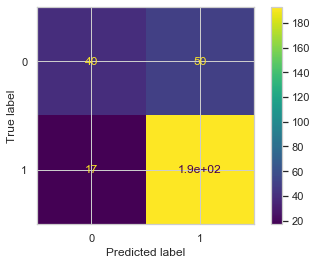

In [213]:
plot_confusion_matrix(logit_test, X_test, y_test)

AUC - Test Set: 80.05%


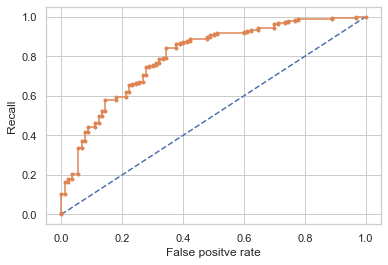

In [214]:
auc = roc_auc_score(y_test, y_final_test_pred_proba)

print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(y_test, y_final_test_pred_proba)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker= '.')
plt.xlabel('False positve rate')
plt.ylabel('Recall')
plt.show()

#### KNN

In [196]:
auc_scores = []
f1_scores = []
accuracy_scores = []
recall_scores = []
precision_scores = []

n_param = []
weight_param = []
p_param = []
met_param = []

for n_neighbors in [3,5,7,9]:
    for weights in ['uniform','distance']:
        for p in [1,2]:
            for metric in ['euclidean', 'manhattan', 'minkowski']:
                knn_manual = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p, metric=metric)
                
                knn_manual.fit(X_train, y_train)
                score_pre = cross_val_score(knn_manual, X_train, y_train, cv= kFold, scoring='precision')
                precision_scores.append(score_pre.mean())
                    
                score_rec = cross_val_score(knn_manual, X_train, y_train, cv= kFold, scoring='recall')
                recall_scores.append(score_rec.mean())
                    
                score_f1 = cross_val_score(knn_manual, X_train, y_train, cv= kFold, scoring='f1')
                f1_scores.append(score_f1.mean())
                    
                score_auc = cross_val_score(knn_manual, X_train, y_train, cv= kFold, scoring='roc_auc')
                auc_scores.append(score_auc.mean())
                    
                score_acc = cross_val_score(knn_manual, X_train, y_train, cv= kFold, scoring='accuracy')
                accuracy_scores.append(score_acc.mean())
                n_param.append(n_neighbors)
                weight_param.append(weights)
                p_param.append(p)
                met_param.append(metric)
                

In [197]:
compare_knn = pd.DataFrame()

compare_knn['Precision mean'] = precision_scores
compare_knn['Recall mean'] = recall_scores
compare_knn['F1 mean'] = f1_scores
compare_knn['AUC mean'] = auc_scores
compare_knn['Accuracy mean'] = accuracy_scores
compare_knn['N Neighbors'] = n_param
compare_knn['Weights'] = weight_param
compare_knn['P'] = p_param
compare_knn['Metric'] = met_param



compare_knn

,Precision mean,Recall mean,F1 mean,AUC mean,Accuracy mean,N Neighbors,Weights,P,Metric
0,0.780362,0.877551,0.824891,0.702867,0.740000,3,uniform,1,euclidean
1,0.775545,0.869388,0.818333,0.700292,0.730000,3,uniform,1,manhattan
2,0.775545,0.869388,0.818333,0.700292,0.730000,3,uniform,1,minkowski
3,0.780362,0.877551,0.824891,0.702867,0.740000,3,uniform,2,euclidean
4,0.775545,0.869388,0.818333,0.700292,0.730000,3,uniform,2,manhattan
5,0.780362,0.877551,0.824891,0.702867,0.740000,3,uniform,2,minkowski
6,0.783938,0.875510,0.826031,0.710350,0.742857,3,distance,1,euclidean
7,0.780909,0.867347,0.820549,0.701846,0.734286,3,distance,1,manhattan
8,0.780909,0.867347,0.820549,0.701846,0.734286,3,distance,1,minkowski
9,0.783938,0.875510,0.826031,0.710350,0.742857,3,distance,2,euclidean


In [201]:
compare_knn.loc[compare_knn['AUC mean'] == compare_knn['AUC mean'].max()]

,Precision mean,Recall mean,F1 mean,AUC mean,Accuracy mean,N Neighbors,Weights,P,Metric
43,0.768783,0.904082,0.830101,0.751652,0.74,9,distance,1,manhattan
44,0.768783,0.904082,0.830101,0.751652,0.74,9,distance,1,minkowski
46,0.768783,0.904082,0.830101,0.751652,0.74,9,distance,2,manhattan


In [215]:
knn_test = KNeighborsClassifier(n_neighbors=9,weights='distance', metric='manhattan', p=1)

knn_test.fit(X_train, y_train)

y_final_test_pred = knn_test.predict(X_test)
y_final_test_pred_proba = knn_test.predict_proba(X_test)[:, 1]

In [216]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.30      0.42        90
           1       0.76      0.95      0.84       210

    accuracy                           0.75       300
   macro avg       0.74      0.62      0.63       300
weighted avg       0.74      0.75      0.72       300



In [217]:

roc_auc_score(y_test, y_final_test_pred_proba)

0.7700793650793651

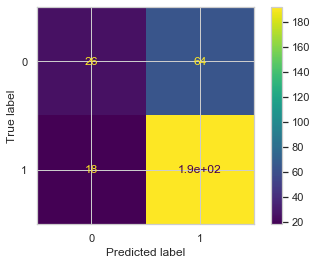

In [218]:
plot_confusion_matrix(v3_knn_test, X_test, y_test)

AUC - Test Set: 77.01%


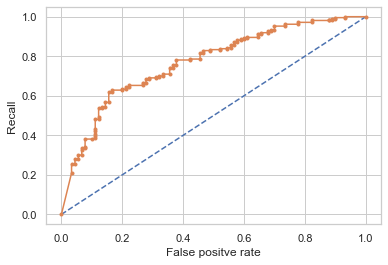

In [219]:
auc = roc_auc_score(y_test, y_final_test_pred_proba)

print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(y_test, y_final_test_pred_proba)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker= '.')
plt.xlabel('False positve rate')
plt.ylabel('Recall')
plt.show()

#### SVM

In [192]:
auc_scores = []
f1_scores = []
accuracy_scores = []
recall_scores = []
precision_scores = []

gamma_param = []
c_param = []
kernel_param = []

for gamma in [1,0.1,0.001,0.0001]:
    for C in [1,10,100,1000]:
        for kernel in ['linear','rbf']:
            svm_manual = SVC(gamma=gamma, C=C, kernel=kernel, probability=True)
            
            svm_manual.fit(X_train, y_train)                
            score_pre = cross_val_score(knn_manual, X_train, y_train, cv= kFold, scoring='precision')
            precision_scores.append(score_pre.mean())
                    
            score_rec = cross_val_score(knn_manual, X_train, y_train, cv= kFold, scoring='recall')
            recall_scores.append(score_rec.mean())
                    
            score_f1 = cross_val_score(knn_manual, X_train, y_train, cv= kFold, scoring='f1')
            f1_scores.append(score_f1.mean())
                    
            score_auc = cross_val_score(knn_manual, X_train, y_train, cv= kFold, scoring='roc_auc')
            auc_scores.append(score_auc.mean())
                    
            score_acc = cross_val_score(knn_manual, X_train, y_train, cv= kFold, scoring='accuracy')
            accuracy_scores.append(score_acc.mean())    
    
            gamma_param.append(gamma)
            c_param.append(C)
            kernel_param.append(kernel)

                

In [193]:
compare_svm = pd.DataFrame()

compare_svm['Precision mean'] = precision_scores
compare_svm['Recall mean'] = recall_scores
compare_svm['F1 mean'] = f1_scores
compare_svm['AUC mean'] = auc_scores
compare_svm['Accuracy mean'] = accuracy_scores
compare_svm['Gamma'] = gamma_param
compare_svm['C'] = c_param
compare_svm['Kernel'] = kernel_param




compare_svm

,Precision mean,Recall mean,F1 mean,AUC mean,Accuracy mean,Gamma,C,Kernel
0,0.766611,0.895918,0.8255,0.74553,0.734286,1.0000,1,linear
1,0.766611,0.895918,0.8255,0.74553,0.734286,1.0000,1,rbf
2,0.766611,0.895918,0.8255,0.74553,0.734286,1.0000,10,linear
3,0.766611,0.895918,0.8255,0.74553,0.734286,1.0000,10,rbf
4,0.766611,0.895918,0.8255,0.74553,0.734286,1.0000,100,linear
5,0.766611,0.895918,0.8255,0.74553,0.734286,1.0000,100,rbf
6,0.766611,0.895918,0.8255,0.74553,0.734286,1.0000,1000,linear
7,0.766611,0.895918,0.8255,0.74553,0.734286,1.0000,1000,rbf
8,0.766611,0.895918,0.8255,0.74553,0.734286,0.1000,1,linear
9,0.766611,0.895918,0.8255,0.74553,0.734286,0.1000,1,rbf


In [202]:
compare_svm.loc[compare_svm['AUC mean'] == compare_svm['AUC mean'].max()]

,Precision mean,Recall mean,F1 mean,AUC mean,Accuracy mean,Gamma,C,Kernel
0,0.766611,0.895918,0.8255,0.74553,0.734286,1.0000,1,linear
1,0.766611,0.895918,0.8255,0.74553,0.734286,1.0000,1,rbf
2,0.766611,0.895918,0.8255,0.74553,0.734286,1.0000,10,linear
3,0.766611,0.895918,0.8255,0.74553,0.734286,1.0000,10,rbf
4,0.766611,0.895918,0.8255,0.74553,0.734286,1.0000,100,linear
5,0.766611,0.895918,0.8255,0.74553,0.734286,1.0000,100,rbf
6,0.766611,0.895918,0.8255,0.74553,0.734286,1.0000,1000,linear
7,0.766611,0.895918,0.8255,0.74553,0.734286,1.0000,1000,rbf
8,0.766611,0.895918,0.8255,0.74553,0.734286,0.1000,1,linear
9,0.766611,0.895918,0.8255,0.74553,0.734286,0.1000,1,rbf


In [220]:
svc_test = SVC(C=1, gamma=1, kernel='linear',probability=True)

In [222]:
svc_test.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [223]:
y_final_test_pred = svc_test.predict(X_test)
y_final_test_pred_proba = svc_test.predict_proba(X_test)[:, 1]

In [224]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.68      0.43      0.53        90
           1       0.79      0.91      0.85       210

    accuracy                           0.77       300
   macro avg       0.74      0.67      0.69       300
weighted avg       0.76      0.77      0.75       300



In [225]:
roc_auc_score(y_test, y_final_test_pred_proba)

0.8061640211640212

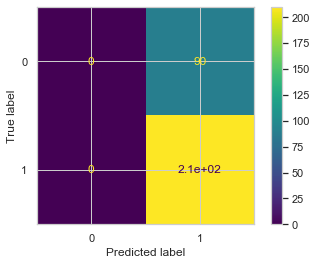

In [226]:
plot_confusion_matrix(v3_svc_test, X_test, y_test)

AUC - Test Set: 80.62%


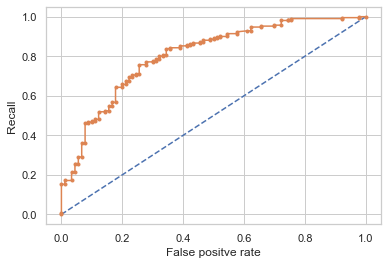

In [227]:
auc = roc_auc_score(y_test, y_final_test_pred_proba)

print('AUC - Test Set: %.2f%%' % (auc*100))

fpr, tpr, thresholds = roc_curve(y_test, y_final_test_pred_proba)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker= '.')
plt.xlabel('False positve rate')
plt.ylabel('Recall')
plt.show()